# Capstone Project - Movie Genre Prediction and Recommender System

## Background

Public screening of movies dates back to as early as the 1800s, and movies have since become an integral form of mass media and entertainment. However, we have all witnessed and contributed to the shift from theatrical to home entertainment, led by the growth of online streaming services like Netflix, Amazon Prime and Apple TV. In fact, according to an industry report, the home entertainment market has grown from 15.8 billion USD in 2014 to 42.6 billion USD in 2018. 

This change in consumer habits has been further accelerated by the Covid-19 pandemic and subsequent restrictions on large public gatherings. As online consumption of movies and other video entertainment continues to grow, the competition in the online streaming industry is also intensifying, with greater investments from established players and new players entering the market.

<br>
<b>Source:</b> <br>
Hollywood studio filmmaking in the age of Netflix: a tale of two institutional logics (https://link.springer.com/article/10.1007/s10824-020-09379-z)

## Problem Statement

A new online movie streaming service, Binge, is planning to launch operations in Singapore. As members of its product development team, we have been tasked with creating:
    <li> A storyline-based genre prediction system for classification of new movies on the platform  </li>
    <li> A system to provide personalized movie recommendations  </li>


## Dataset

The dataset was retrieved from Kaggle and was originally scraped from the publicly available website https://www.imdb.com. All movies with more than 100 votes were scraped as of 01/01/2020. 

It includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.

## Importing Basic Libraries

In [1]:
#Importing basic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
#Reading in movies dataset
movies = pd.read_csv('data/IMDb movies.csv')

In [3]:
#Reading in ratings dataset
ratings = pd.read_csv('data/IMDb ratings.csv')

## Data Cleaning: Initial Check

In [4]:
#Inspecting dataset
movies.head()

imdb_title_id                        title               original_title  \
0     tt0000009                   Miss Jerry                   Miss Jerry   
1     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
2     tt0001892               Den sorte drøm               Den sorte drøm   
3     tt0002101                    Cleopatra                    Cleopatra   
4     tt0002130                    L'Inferno                    L'Inferno   

   year date_published                      genre  duration           country  \
0  1894     1894-10-09                    Romance        45               USA   
1  1906     1906-12-26    Biography, Crime, Drama        70         Australia   
2  1911     1911-08-19                      Drama        53  Germany, Denmark   
3  1912     1912-11-13             Drama, History       100               USA   
4  1911     1911-03-06  Adventure, Drama, Fantasy        68             Italy   

  language                             director  ...  \
0     None                      Alexander Black  ...   
1     None                         Charles Tait  ...   
2      NaN                            Urban Gad  ...   
3  English                   Charles L. Gaskill  ...   
4  Italian  Francesco Bertolini, Adolfo Padovan  ...   

                                              actors  \
0  Blanche Bayliss, William Courtenay, Chauncey D...   
1  Elizabeth Tait, John Tait, Norman Campbell, Be...   
2  Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3  Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4  Salvatore Papa, Arturo Pirovano, Giuseppe de L...   

                                         description avg_vote votes   budget  \
0  The adventures of a female reporter in the 1890s.      5.9   154      NaN   
1  True story of notorious Australian outlaw Ned ...      6.1   589   $ 2250   
2  Two men of high rank are both wooing the beaut...      5.8   188      NaN   
3  The fabled queen of Egypt's affair with Roman ...      5.2   446  $ 45000   
4  Loosely adapted from Dante's Divine Comedy and...      7.0  2237      NaN   

   usa_gross_income worlwide_gross_income metascore reviews_from_users  \
0               NaN                   NaN       NaN                1.0   
1               NaN                   NaN       NaN                7.0   
2               NaN                   NaN       NaN                5.0   
3               NaN                   NaN       NaN               25.0   
4               NaN                   NaN       NaN               31.0   

   reviews_from_critics  
0                   2.0  
1                   7.0  
2                   2.0  
3                   3.0  
4                  14.0  

[5 rows x 22 columns]

In [5]:
#Inspecting shape of the dataframe
movies.shape

(85855, 22)

<i> The movies dataset consists of 85,855 movies and 22 features 

In [6]:
#Inspecting data types
movies.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [11]:
#Checking for duplicate entries
movies.duplicated(subset='imdb_title_id', keep='first').value_counts()

False    85855
dtype: int64

In [12]:
#Checking for null values
movies.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

<i> As we will be using the description for predicting movie genres, we will focus only on english-language movies

In [13]:
movies_english = movies[movies['language'] == 'English']
movies_english.reset_index(drop=True, inplace=True)
movies_english.shape

(35939, 22)

<i> Moving forward, we will only keep the columns that may be relevant for the scope of this project, such as the id, title, year, genre and description. For the time being, we will retain both the title and original_title columns.

In [14]:
movies_english = movies_english[['imdb_title_id', 'title', 'original_title', 'year', 'genre', 'description']]

In [15]:
#Inspecting shape of updated dataframe
movies_english.shape

(35939, 6)

In [16]:
#Inspecting data types of upated dataframe
movies_english.dtypes

imdb_title_id     object
title             object
original_title    object
year               int64
genre             object
description       object
dtype: object

In [17]:
#Inspecting null values in the updated dataframe
movies_english.isnull().sum()

imdb_title_id       0
title               0
original_title      0
year                0
genre               0
description       120
dtype: int64

## Exploratory Data Analysis (EDA)

In [18]:
movies_english.head()

imdb_title_id                                              title  \
0     tt0002101                                          Cleopatra   
1     tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
2     tt0002461                                        Richard III   
3     tt0003167                                     Amore di madre   
4     tt0003471                                   Traffic in Souls   

                                      original_title  year             genre  \
0                                          Cleopatra  1912    Drama, History   
1  From the Manger to the Cross; or, Jesus of Naz...  1912  Biography, Drama   
2                                        Richard III  1912             Drama   
3                                   Home, Sweet Home  1914             Drama   
4                                   Traffic in Souls  1913      Crime, Drama   

                                         description  
0  The fabled queen of Egypt's affair with Roman ...  
1  An account of the life of Jesus Christ, based ...  
2  Richard of Gloucester uses manipulation and mu...  
3  John Howard Payne at his most miserable point ...  
4  A woman, with the aid of her police officer sw...

<i> As we will be leveraging the description to predict movie genres, we took a closer look at the column and observed that some of the descriptions in the dataset have been truncated.

In [19]:
movies_english['description'][1]

"An account of the life of Jesus Christ, based on the books of the New Testament: After Jesus' birth is foretold to his parents, he is born in Bethlehem, and is visited by shepherds and wise..."

In [20]:
movies_english['description'][6]

'After the bandit Jim Stokes robs the stage he is wounded fleeing. Recuperating at a ranch, he falls in love with and marries the daughter. Now wishing to go straight he tries to return the ...'

<i> To ensure we get a complete description/storyline for each movie, we scrape the storylines of the movies within the dataset directly from IMDB using BeautifulSoup.

#### Scraping Storylines from IMDB

In [21]:
#Importing libraries
import requests
from bs4 import BeautifulSoup
import time
import random

In [22]:
#Defining function to scrape storylines and save in a separate dataframe
movie_id = []
storyline_list = []

for title_id in movies_english['imdb_title_id']:
    try:
        url = 'https://www.imdb.com/title/'+str(title_id)+'/'
        res = requests.get(url, headers={'User-agent': 'Pony Inc 2.0'})
        status = res.status_code
        if res.status_code != 200:
            print('Status error', res.status_code)
            break
        soup = BeautifulSoup(res.content, 'html.parser') #Using BeautifulSoup
        storyline_text = soup.find('div', {'class': 'inline canwrap'})
        storyline = str(storyline_text.find('span')).replace('<span>', '').replace('</span>', '')
        movie_id.append(title_id)
        storyline_list.append(storyline)
        all_storylines = pd.DataFrame({'imdb_title_id': movie_id,'storyline': storyline_list})
        all_storylines.to_csv('all_storylines.csv', index = False)
        sleep_duration = random.randint(2,4)
        time.sleep(sleep_duration)
    except:
        pass

In [26]:
#Inspecting dataframe with storylines
all_storylines.head()

imdb_title_id                                          storyline
0     tt0002101      When she discovers that a slave named Phar...
1     tt0002199      An account of the life of Jesus Christ, ba...
2     tt0002461      Shakespeare's tragedy of the hump-backed D...
3     tt0003167      Over the protests of his mother and sweeth...
4     tt0003471      An early social commentary on the New York...

In [27]:
#Inspecting shape of the dataframe 
all_storylines.shape

(35847, 2)

<i> We were able to scrape 35847 storylines from IMDB. We then combine the dataframe with the storylines to the original dataframe using the imdb_title_id column to merge.

In [28]:
movies_english = pd.merge(movies_english, all_storylines, on='imdb_title_id', how='outer')
movies_english.shape

(35939, 7)

In [29]:
#Inspecting dataframe
movies_english.head()

imdb_title_id                                              title  \
0     tt0002101                                          Cleopatra   
1     tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
2     tt0002461                                        Richard III   
3     tt0003167                                     Amore di madre   
4     tt0003471                                   Traffic in Souls   

                                      original_title  year             genre  \
0                                          Cleopatra  1912    Drama, History   
1  From the Manger to the Cross; or, Jesus of Naz...  1912  Biography, Drama   
2                                        Richard III  1912             Drama   
3                                   Home, Sweet Home  1914             Drama   
4                                   Traffic in Souls  1913      Crime, Drama   

                                         description  \
0  The fabled queen of Egypt's affair with Roman ...   
1  An account of the life of Jesus Christ, based ...   
2  Richard of Gloucester uses manipulation and mu...   
3  John Howard Payne at his most miserable point ...   
4  A woman, with the aid of her police officer sw...   

                                           storyline  
0      When she discovers that a slave named Phar...  
1      An account of the life of Jesus Christ, ba...  
2      Shakespeare's tragedy of the hump-backed D...  
3      Over the protests of his mother and sweeth...  
4      An early social commentary on the New York...

In [30]:
#Inspecting null values
movies_english['storyline'].isnull().sum()

92

<i> We were unable to obtain the storylines for 92 movies. As such, we drop these movies. 

In [31]:
movies_english.dropna(subset=['storyline'], inplace=True)
movies_english.reset_index(drop=True, inplace=True)

In [32]:
#Inspecting shape of updated dataframe
movies_english.shape

(35847, 7)

In [33]:
#Inspecting null values in the updated dataframe
movies_english.isnull().sum()

imdb_title_id      0
title              0
original_title     0
year               0
genre              0
description       39
storyline          0
dtype: int64

In [34]:
#Inspecting data types 
movies_english.dtypes

imdb_title_id     object
title             object
original_title    object
year               int64
genre             object
description       object
storyline         object
dtype: object

<i> We then ensure that the relevant columns are of string type

In [35]:
movies_english['genre'] = movies_english['genre'].astype(str)
movies_english['description'] = movies_english['description'].astype(str)
movies_english['storyline'] = movies_english['storyline'].astype(str)

<i> We then move onto looking into the target varible, genre

In [36]:
#Inspecting value counts
movies_english['genre'].value_counts()

Drama                          3409
Comedy                         2498
Horror                         1492
Comedy, Drama                  1302
Drama, Romance                 1134
                               ... 
Drama, Family, Comedy             1
Comedy, Family, Adventure         1
Action, Sci-Fi, Horror            1
Thriller, Action, Adventure       1
Family, Music, Romance            1
Name: genre, Length: 951, dtype: int64

<i> As expected, movies can have a number of unique combinations of various genre labels. For our dataset, there are 951 different combinations. As such, we look into extracting the unique genres that feature across the movies.

In [37]:
#Extracting list of unique genres
unique_genres = movies_english['genre'].unique()

list_of_genres = []
for genre in unique_genres:
    if ',' not in genre: #To identify presence of multiple genres
        if genre not in list_of_genres:
            list_of_genres.append(genre)
    else:
        split_genres = genre.split()
        for genres in split_genres:
            genres = genres.replace(',', '')
            if genres not in list_of_genres:
                list_of_genres.append(genres)
list_of_genres

['Drama',
 'History',
 'Biography',
 'Crime',
 'Horror',
 'Western',
 'Fantasy',
 'Comedy',
 'Family',
 'Adventure',
 'Action',
 'Romance',
 'War',
 'Sci-Fi',
 'Mystery',
 'Thriller',
 'Sport',
 'Musical',
 'Music',
 'Film-Noir',
 'Animation',
 'Adult',
 'Documentary',
 'Reality-TV',
 'News']

In [38]:
len(list_of_genres)

25

<i> There are 25 unique genres overall. To get a sense of the number of movies under each genre and for the purpose of modelling, we create a column for each genre and assign a value of 1 if a given movie falls within the particular genre and 0 if it doesn't.

In [39]:
for genre in list_of_genres:
    movies_english[genre] = movies_english['genre'].map(lambda x : 1 if genre in x else 0) 
movies_english.shape

(35847, 32)

<i> We now have 25 additional columns, 1 for each genre

In [40]:
movies_english.head()

imdb_title_id                                              title  \
0     tt0002101                                          Cleopatra   
1     tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
2     tt0002461                                        Richard III   
3     tt0003167                                     Amore di madre   
4     tt0003471                                   Traffic in Souls   

                                      original_title  year             genre  \
0                                          Cleopatra  1912    Drama, History   
1  From the Manger to the Cross; or, Jesus of Naz...  1912  Biography, Drama   
2                                        Richard III  1912             Drama   
3                                   Home, Sweet Home  1914             Drama   
4                                   Traffic in Souls  1913      Crime, Drama   

                                         description  \
0  The fabled queen of Egypt's affair with Roman ...   
1  An account of the life of Jesus Christ, based ...   
2  Richard of Gloucester uses manipulation and mu...   
3  John Howard Payne at his most miserable point ...   
4  A woman, with the aid of her police officer sw...   

                                           storyline  Drama  History  \
0      When she discovers that a slave named Phar...      1        1   
1      An account of the life of Jesus Christ, ba...      1        0   
2      Shakespeare's tragedy of the hump-backed D...      1        0   
3      Over the protests of his mother and sweeth...      1        0   
4      An early social commentary on the New York...      1        0   

   Biography  ...  Thriller  Sport  Musical  Music  Film-Noir  Animation  \
0          0  ...         0      0        0      0          0          0   
1          1  ...         0      0        0      0          0          0   
2          0  ...         0      0        0      0          0          0   
3          0  ...         0      0        0      0          0          0   
4          0  ...         0      0        0      0          0          0   

   Adult  Documentary  Reality-TV  News  
0      0            0           0     0  
1      0            0           0     0  
2      0            0           0     0  
3      0            0           0     0  
4      0            0           0     0  

[5 rows x 32 columns]

<i> We can now use these columns to find out the number of movies that fall under each genre

In [41]:
genre_count = {}
for genre in list_of_genres:
    genre_count[genre] = movies_english[genre].sum()
genre_count_df = pd.DataFrame.from_dict(genre_count, orient = 'index') #Creating df with genre and count of movies
genre_count_df = genre_count_df.sort_values(by = 0, ascending=False) #Sorting values by count
genre_count_df

0
Drama        17378
Comedy       11752
Horror        6448
Thriller      6141
Romance       5578
Action        5313
Crime         5189
Adventure     3628
Mystery       2774
Sci-Fi        2410
Music         1831
Family        1671
Fantasy       1635
Western       1095
Biography      957
Musical        915
War            659
Animation      643
History        592
Sport          587
Film-Noir      559
Reality-TV       2
Adult            1
Documentary      1
News             1

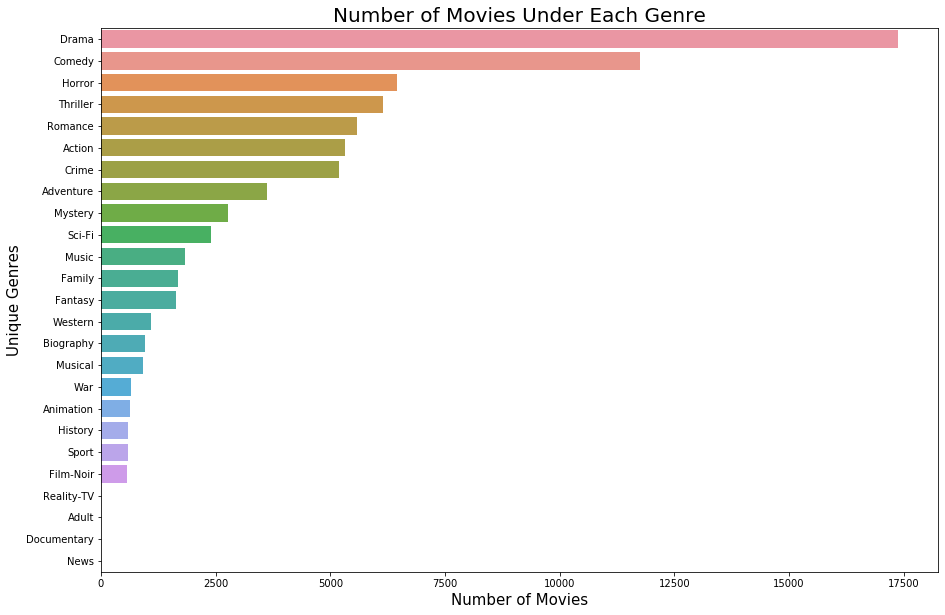

In [42]:
#Plotting bar graph with count of movies that fall under each genre
plt.figure(figsize = (15,10))
sns.barplot(genre_count_df[0], genre_count_df.index, orient = "h");
plt.title('Number of Movies Under Each Genre', fontsize = 20);
plt.xlabel('Number of Movies', fontsize = 15);
plt.ylabel('Unique Genres', fontsize = 15);

<i> We are also interested in finding out how many genre labels each movie has

In [43]:
single_label_count = 0
multiple_labels_count = []
for genres in movies_english['genre']:
    if ',' not in genres:
        single_label_count += 1
    else:
        genre_split = genres.split()
        count = len(genre_split)
        multiple_labels_count.append(count)

In [44]:
single_label_count

9647

<i> There are 9647 movies that are labelled as falling under one genre. We also want to see how many movies fall under multiple genres.

In [45]:
set(multiple_labels_count)

{2, 3}

In [46]:
#Movies under 2 genres
multiple_labels_count.count(2)

11374

In [47]:
#Movies under 3 genres
multiple_labels_count.count(3)

14826

<i> Overall, movies either fall under a single genre, two or three. And a number of movies have multiple genres.

In [48]:
label_count = {}
label_count['single_genre'] = single_label_count
label_count['two_genres'] = multiple_labels_count.count(2)
label_count['three_genres'] = multiple_labels_count.count(3)
label_count

{'single_genre': 9647, 'two_genres': 11374, 'three_genres': 14826}

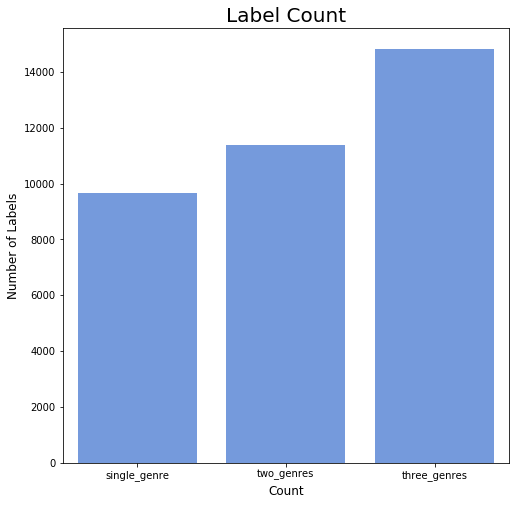

In [49]:
#Plotting number of genre labels across movies
plt.figure(figsize = (8,8))
sns.barplot(list(label_count.keys()), list(label_count.values()),  orient = "v", color = 'cornflowerblue');
plt.title('Label Count', fontsize = 20);
plt.xlabel('Count', fontsize = 12);
plt.ylabel('Number of Labels', fontsize = 12);

<i> As some genres occur less frequently, we will focus only on the top 14 genres for this project, as they all occur more than 1000 times. The remaining genres will be clubbed together into an 'Others' category.

In [50]:
movies_english['Others'] = 0 #Assigning zero to all observations to begin with

others = ['Biography', 'Musical', 'War', 'Animation', 'History', 'Sport', 
          'Film-Noir', 'Reality-TV', 'Adult', 'Documentary', 'News']

for column in others:
    for x in range(0, len(movies_english['Others'])):
        if movies_english[column][x] == 1:
            movies_english['Others'][x] = 1 #Assigning 1 if the movie falls under any genre in the others category

In [51]:
movies_english['Others'].value_counts()

0    31296
1     4551
Name: Others, dtype: int64

<i> Overall, 4551 movies fall under genres within the others category. We can now proceed to drop the genre columns that have been accounted for under 'Others'.

In [52]:
movies_english.drop(columns = ['Biography','Musical', 'War', 'Animation', 'History', 'Sport', 
                               'Film-Noir', 'Reality-TV', 'Adult', 'Documentary', 'News'], inplace=True)
movies_english.shape

(35847, 22)

<i> In addition to the genres, we also want to look at the storyline column as we will be using it to predict the genres. Primarily, we are keen to look at how long the storylines are and find out more about the text. We start by looking at the distribution of the storyline length through a histogram.

In [53]:
movies_english['storyline_length'] = movies_english['storyline'].map(lambda x : len(x.split()))

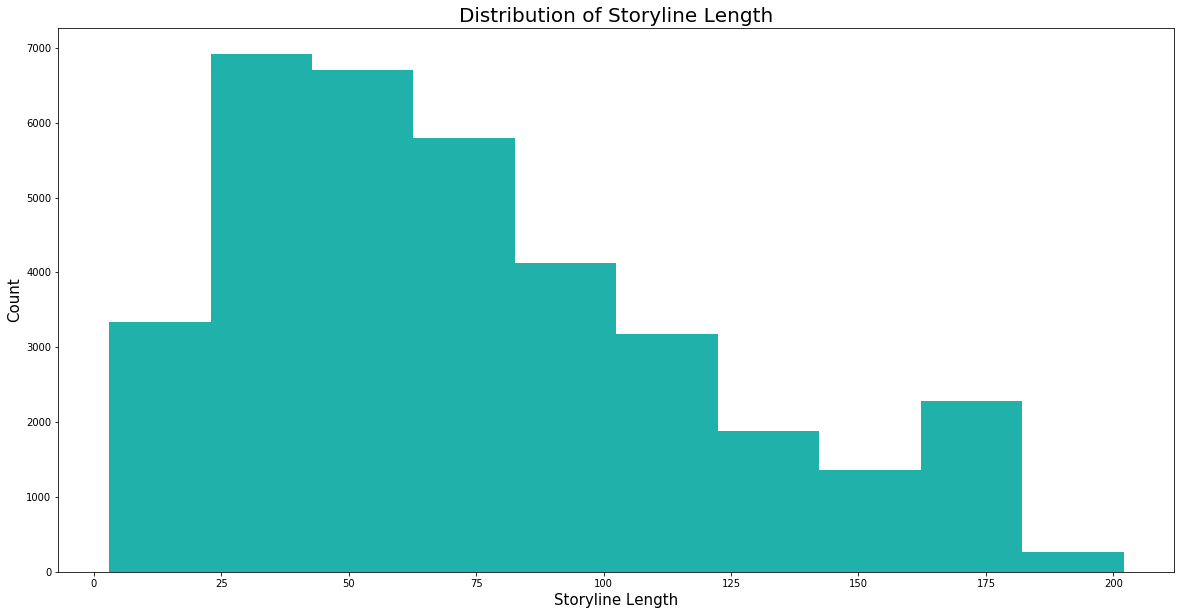

In [54]:
plt.figure(figsize = (20,10))
plt.hist(movies_english['storyline_length'], color = 'lightseagreen');
plt.title('Distribution of Storyline Length', fontsize = 20);
plt.xlabel('Storyline Length', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

<i> Most storylines are between the 25-75 word bracket, with about 3000+ being shorter (between 0-25 words). There is a lower incidence of storylines with more than 125 words.

<i> Before looking at the text itself, we will undertake some text cleaning to gain more robust insights and make the text model-ready.

### Text Cleaning

In [55]:
#Importing libraries
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet 
from nltk.corpus import stopwords 
import regex as re 
from PIL import Image 

In [56]:
#Defining function to lemmatize, remove non-letters, convert all text to lowercase and remove stop words
def cleaning_text(storyline):    
    
    # 1. Remove HTML.
    text_nohtml = BeautifulSoup(storyline).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", text_nohtml)
    
    # 3. Convert to lower case
    text = letters_only.lower()
    
    # 4. Lemmatizing and splitting into individual words
    #To improve lemmatization and make it context dependent, 
    #we define function to find out the POS (Part of Sentence) tag and pass it on to the lemmatizer
    
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    
    # Defining function to convert nltk tag to wordnet tag
    def nltk_tag_to_wordnet_tag(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:          
            return None

    #Defining function to lemmatize text according to POS tag and split into individual words
    def lemmatize_text(text_to_lemmatize): 
        nltk_tagged=nltk.pos_tag(nltk.word_tokenize(text_to_lemmatize)) #tokenize the text and find the POS tag for each token
        wordnet_tagged=map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) #tuple of(token, wordnet_tag)
        lemmatized_text = []
        for word, tag in wordnet_tagged:
            if tag is None:
                lemmatized_text.append(word) #if there is no available tag, append the token as is
            else:        
                lemmatized_text.append(lemmatizer.lemmatize(word, tag)) #else use the tag to lemmatize the token
        return lemmatized_text
    
    lemmatized_words = lemmatize_text(text)
    
    # 5. As searching a set is much faster than searching a list, we convert the stopwords to a set
    stops = set(stopwords.words('english'))
    
    # 6. Remove stopwords.
    meaningful_words = [w for w in lemmatized_words if not w in stops]
    
    # 7. Join the words back into one string separated by space and return the result
    return(" ".join(meaningful_words))

In [57]:
#Applying function to the storyline text
movies_english['storyline_clean'] = movies_english['storyline'].apply(cleaning_text)

<i> Now that the storyline text has been cleaned, we will take a look at the 100 most frequently occurings words through a word cloud and also plot a bar graph with the frequency of the 20 most commonly occuring words

In [58]:
#Importing libraries
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

In [59]:
#Defining function to generate wordcloud of 100 most common words and bar chart with frequency of 20 most common words
def generate_wordcloud_barchart(storylines):
    allwords_storylines = []
    for story in storylines:
        words = story.split()
        for word in words:
            allwords_storylines.append(word)
    mostcommon = FreqDist(allwords_storylines).most_common(100) #Extracting 100 most common words
    #mask = np.array(Image.open('popcorn.jpg'))
    wordcloud = WordCloud(width=1600, height=800, 
                          background_color='white').generate(str(mostcommon).replace("'",''))
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Top 100 Most Common Words', fontsize=30)
    #plt.tight_layout(pad=0)
    plt.show();
    mostcommon_20 = FreqDist(allwords_storylines).most_common(20) #Extracting 20 most common words
    words_storyline = []
    frequency_storyline = []
    for item in mostcommon_20:
        words_storyline.append(item[0])
        frequency_storyline.append(item[1])
    plt.figure(figsize=(30,10))
    plt.bar(words_storyline, frequency_storyline, color = 'lightslategrey', align = 'center')
    plt.xlabel('Common Words', fontsize=30)
    plt.ylabel('Frequency of Words', fontsize=40)
    plt.yticks(fontsize=30)
    plt.xticks(rotation=60, fontsize=30)
    plt.title('Frequency of 20 Most Common Words', fontsize=50)
    plt.show();

#### For the full set of storylines

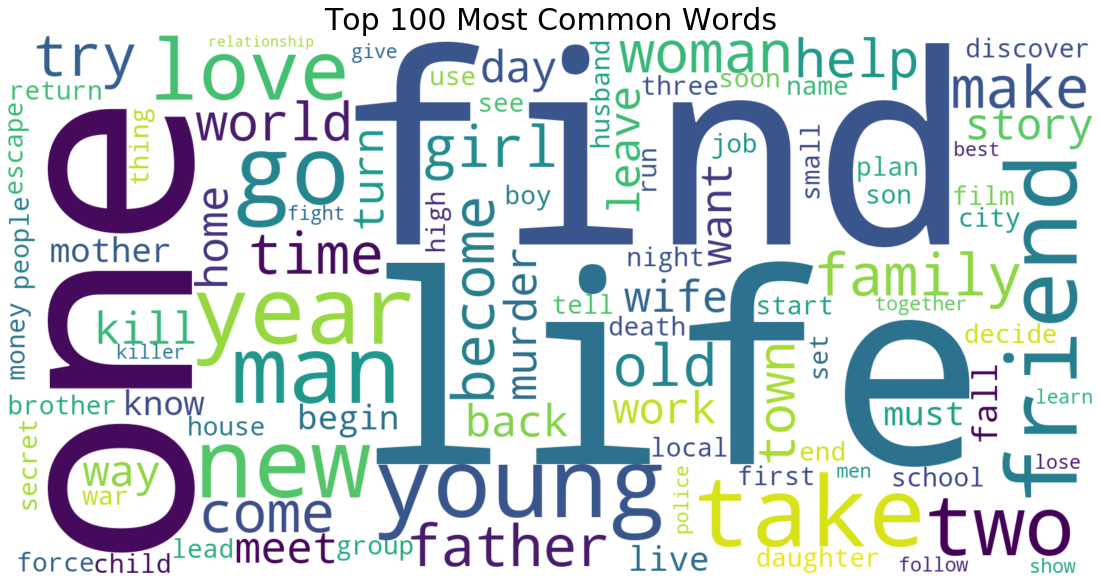

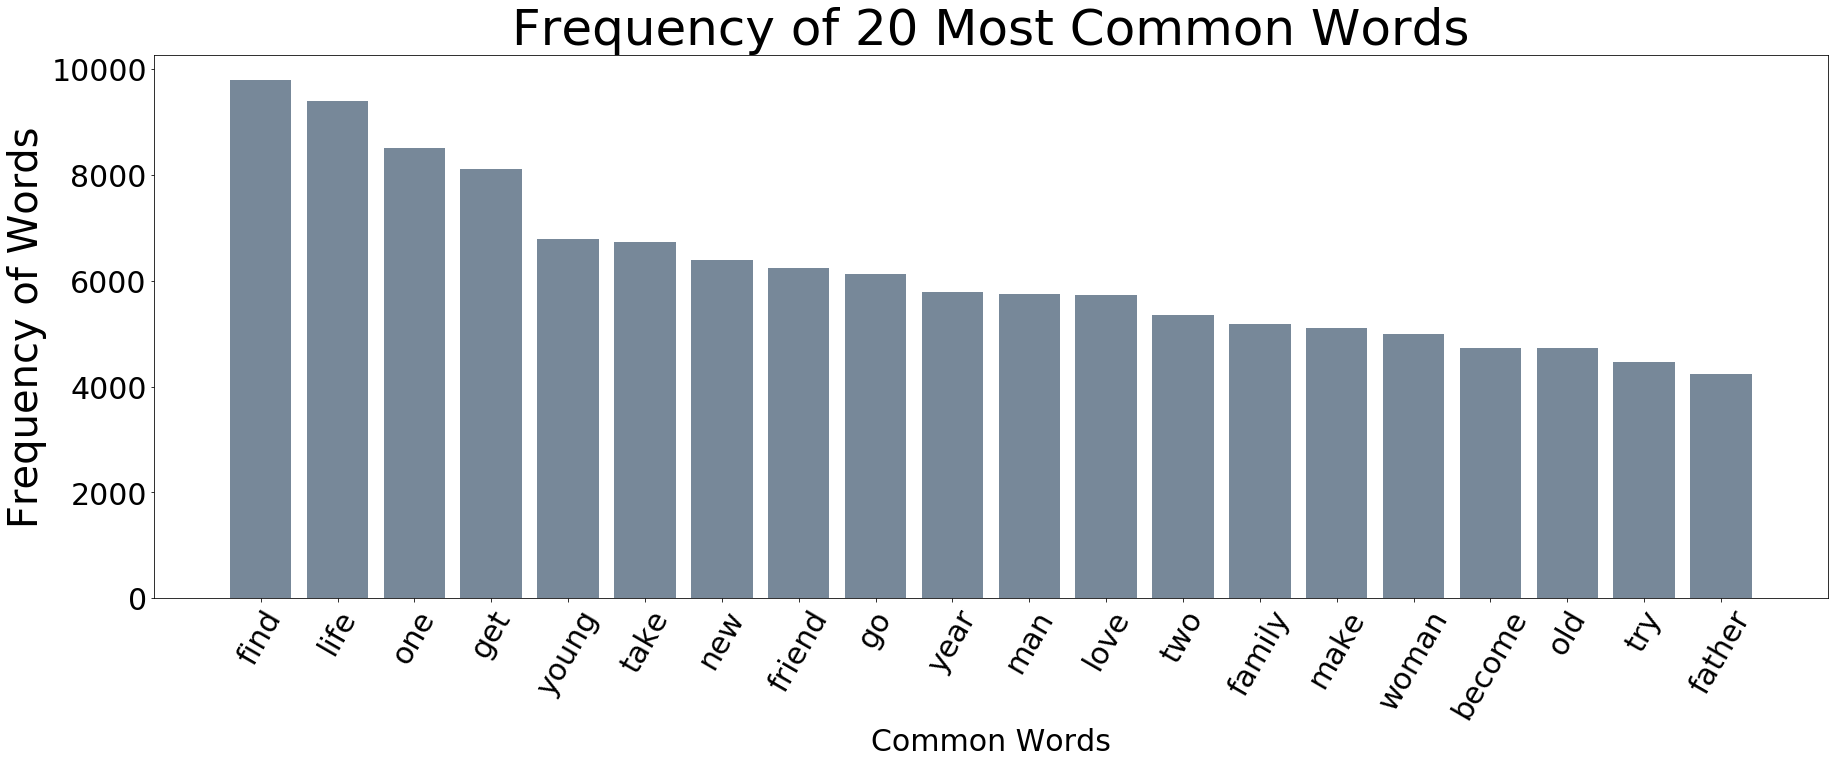

In [60]:
generate_wordcloud_barchart(movies_english['storyline_clean'])

#### By genre for the top 10 genres

#### Drama

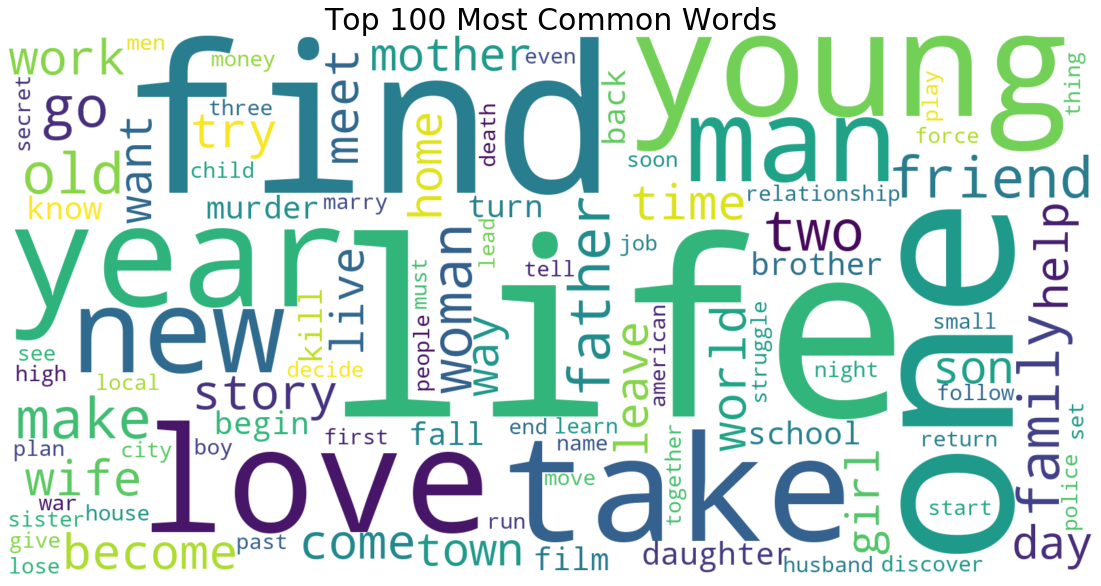

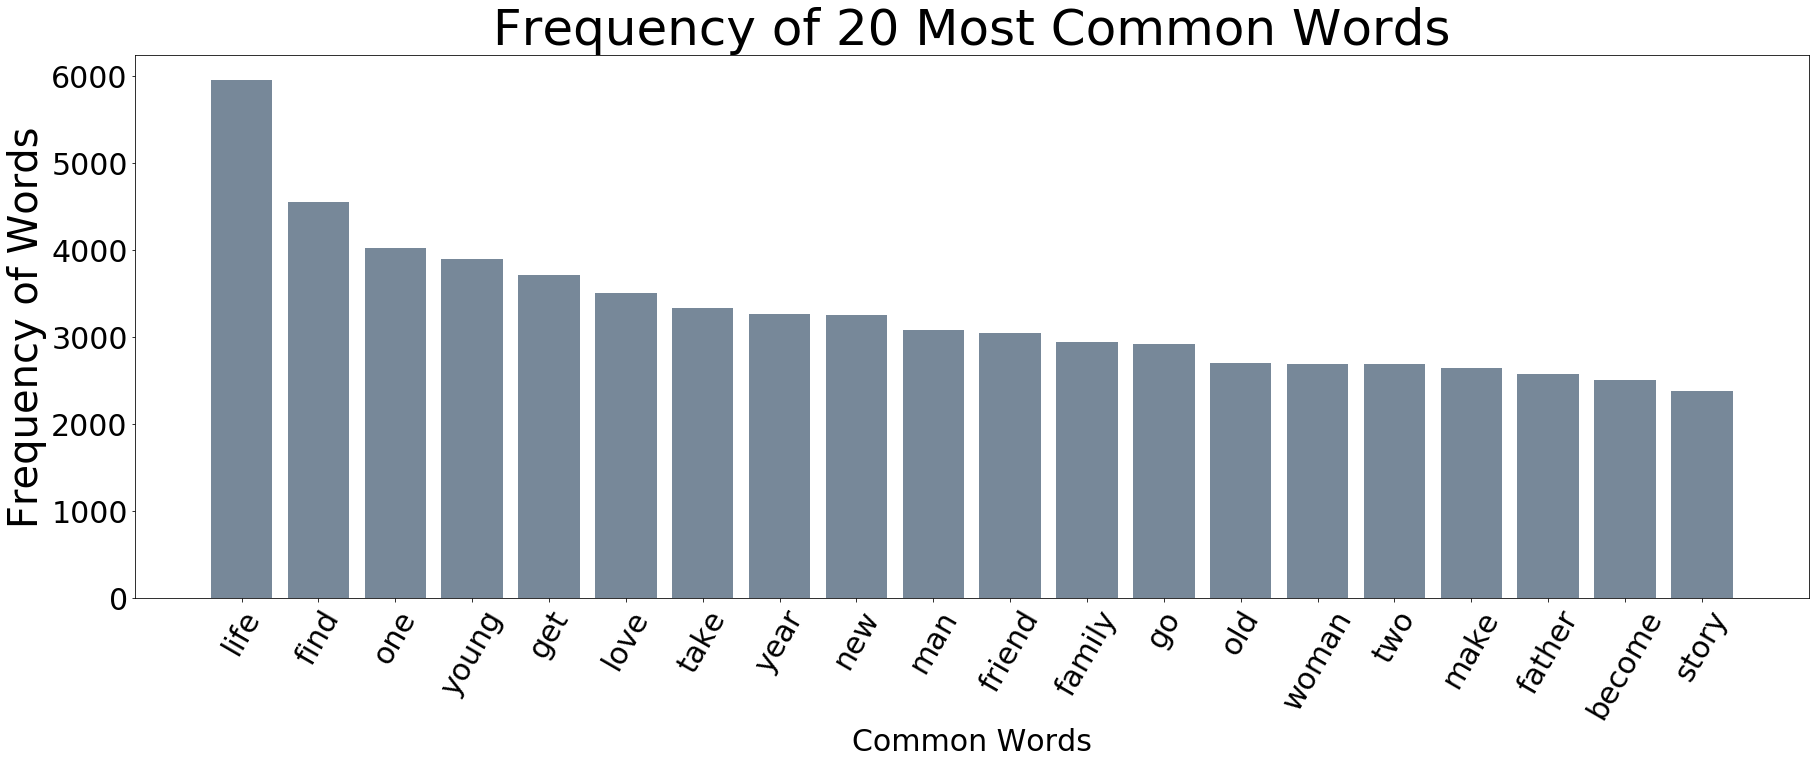

In [61]:
drama_movies = movies_english[movies_english['Drama']==1]
drama_storylines = drama_movies['storyline_clean']
generate_wordcloud_barchart(drama_storylines)

<i> Many of the top 20 words are generic words that can also be observed frequently across other genres.

#### Comedy

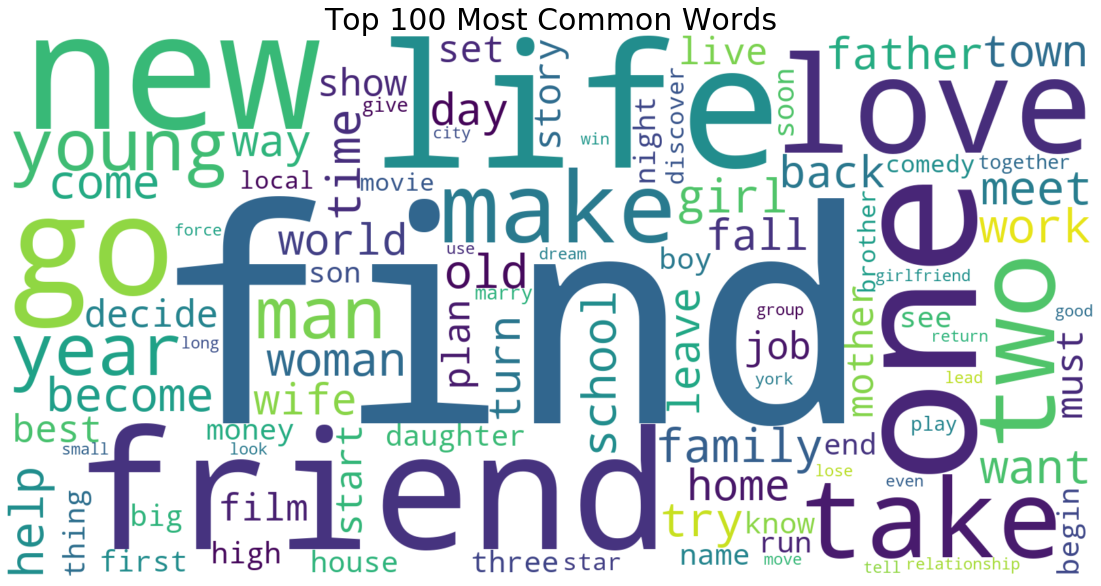

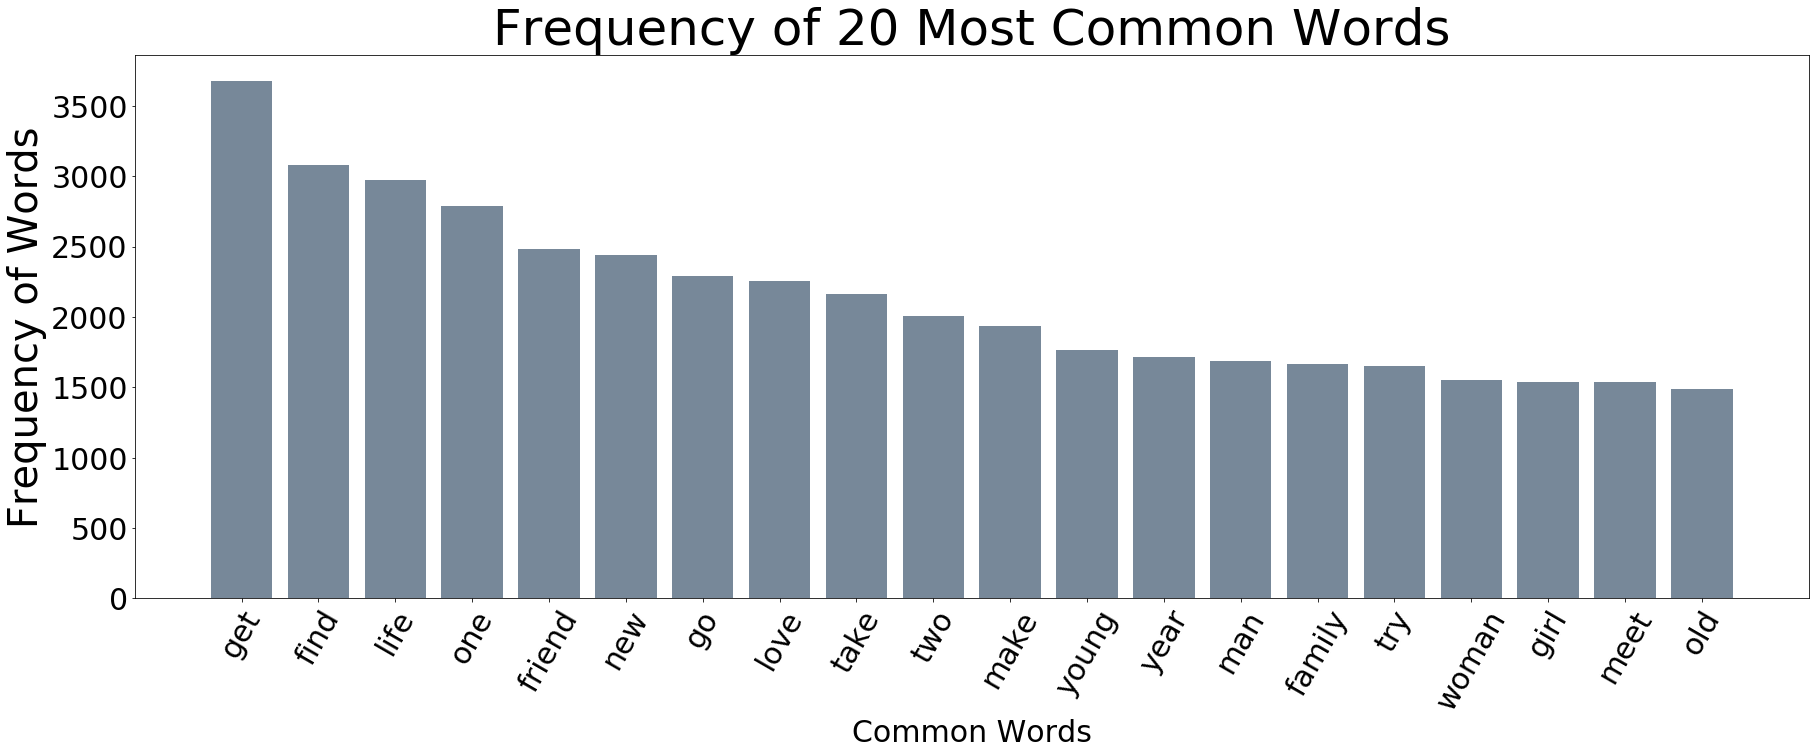

In [62]:
comedy_movies = movies_english[movies_english['Comedy']==1]
comedy_storylines = comedy_movies['storyline_clean']
generate_wordcloud_barchart(comedy_storylines)

<i> Likewise for comedy, many of the top 20 words are generic words that can also be observed frequently across other genres.

#### Horror

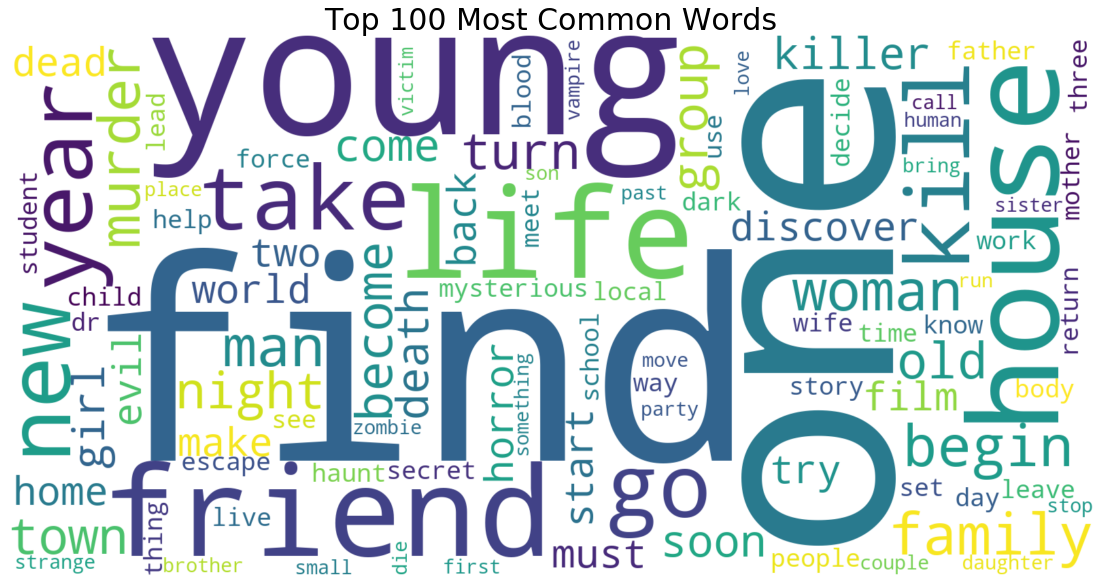

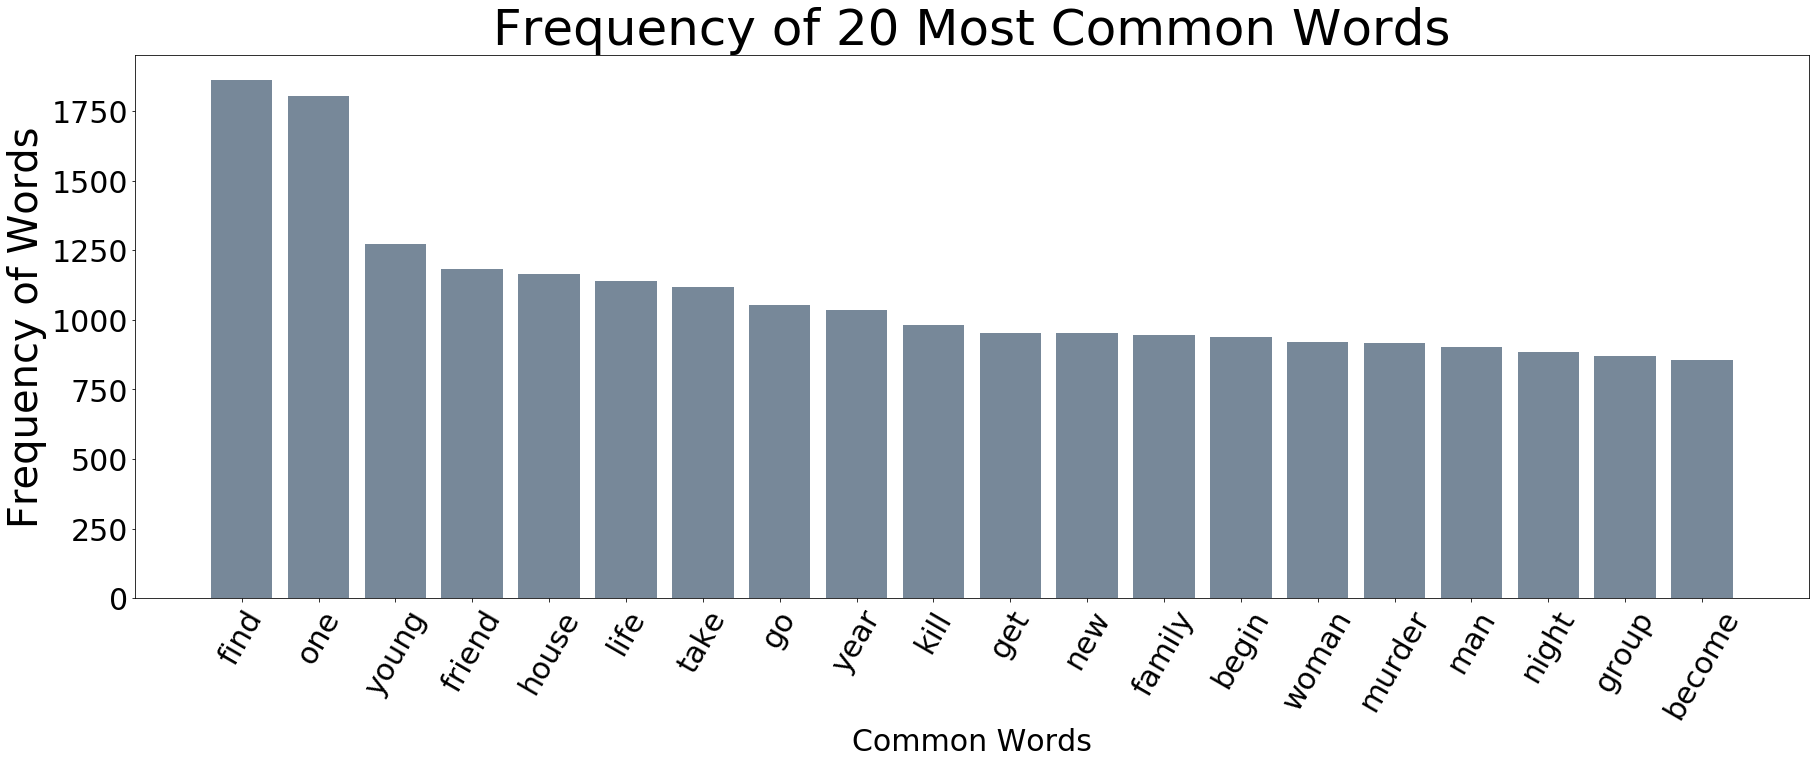

In [63]:
horror_movies = movies_english[movies_english['Horror']==1]
horror_storylines = horror_movies['storyline_clean']
generate_wordcloud_barchart(horror_storylines)

<i> While some of the top 20 words are generic, others like kill, murder and night are somewhat unique to the genre

#### Thriller

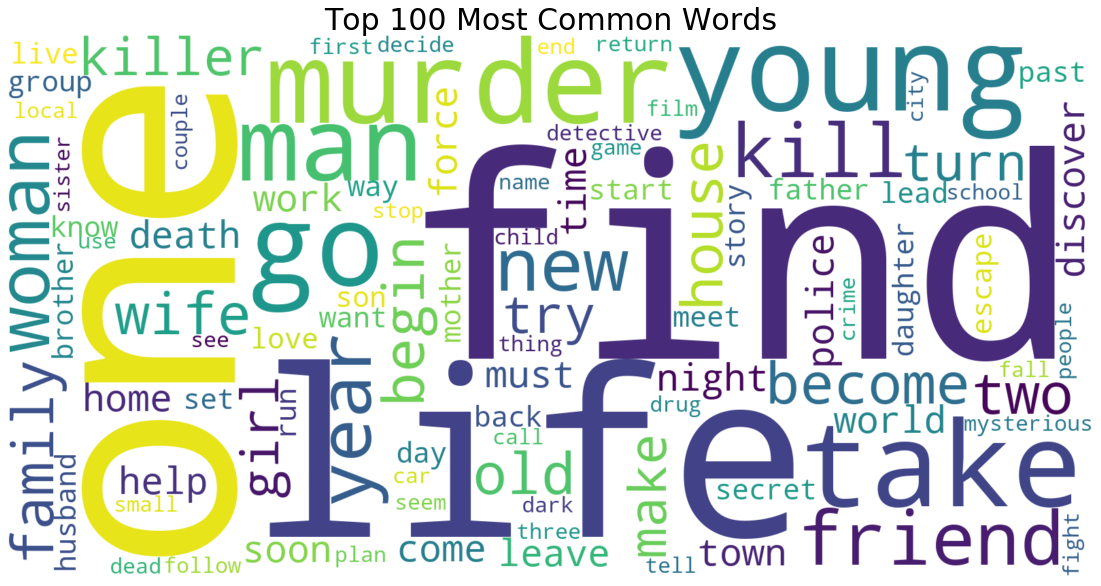

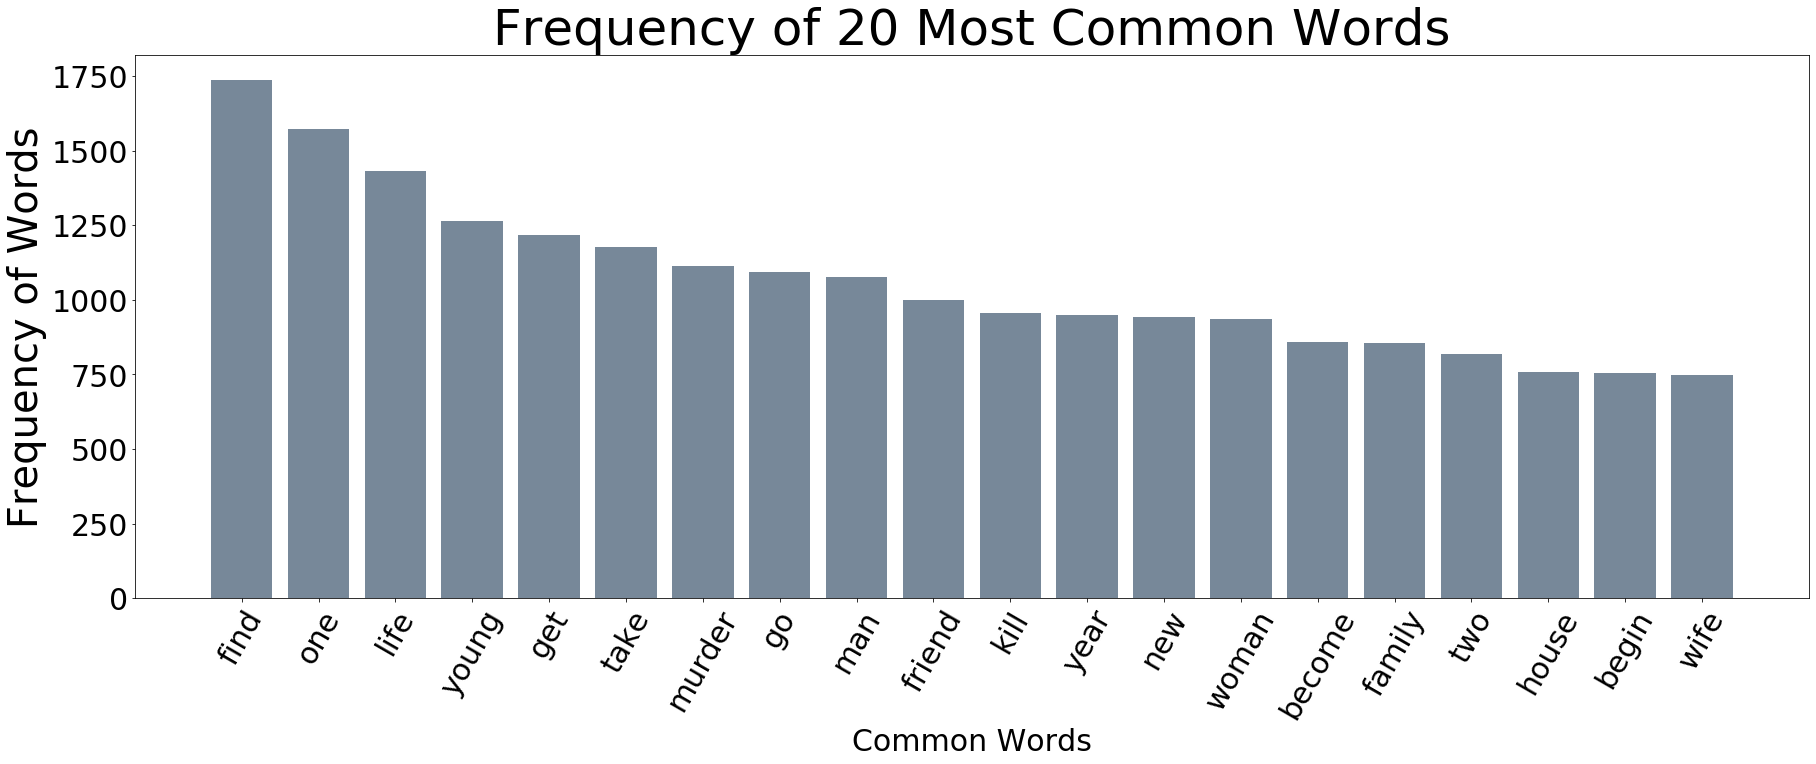

In [64]:
thriller_movies = movies_english[movies_english['Thriller']==1]
thriller_storylines = thriller_movies['storyline_clean']
generate_wordcloud_barchart(thriller_storylines)

<i> Though distinct from drama and comedy to some extent, there are similarities within the words occurring commonly in the horror and thriller genres 

#### Romance

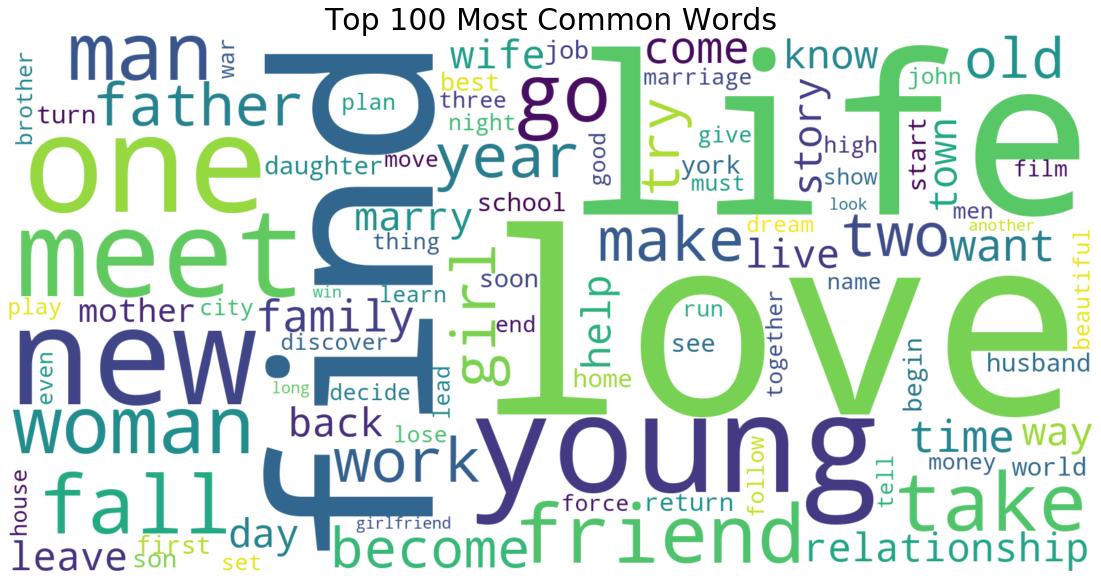

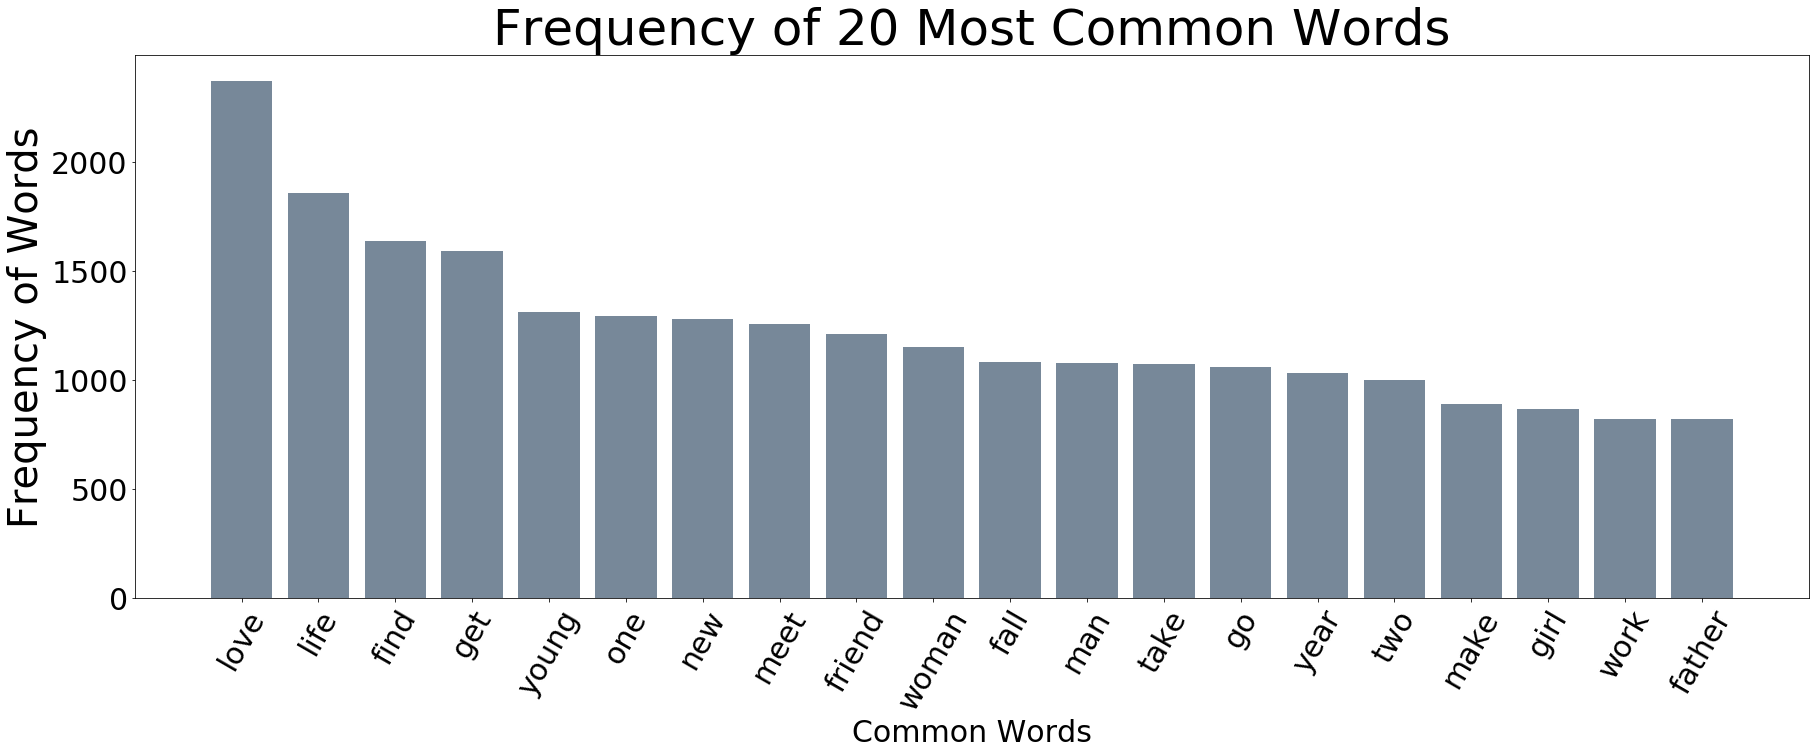

In [65]:
romance_movies = movies_english[movies_english['Romance']==1]
romance_storylines = romance_movies['storyline_clean']
generate_wordcloud_barchart(romance_storylines)

#### Action

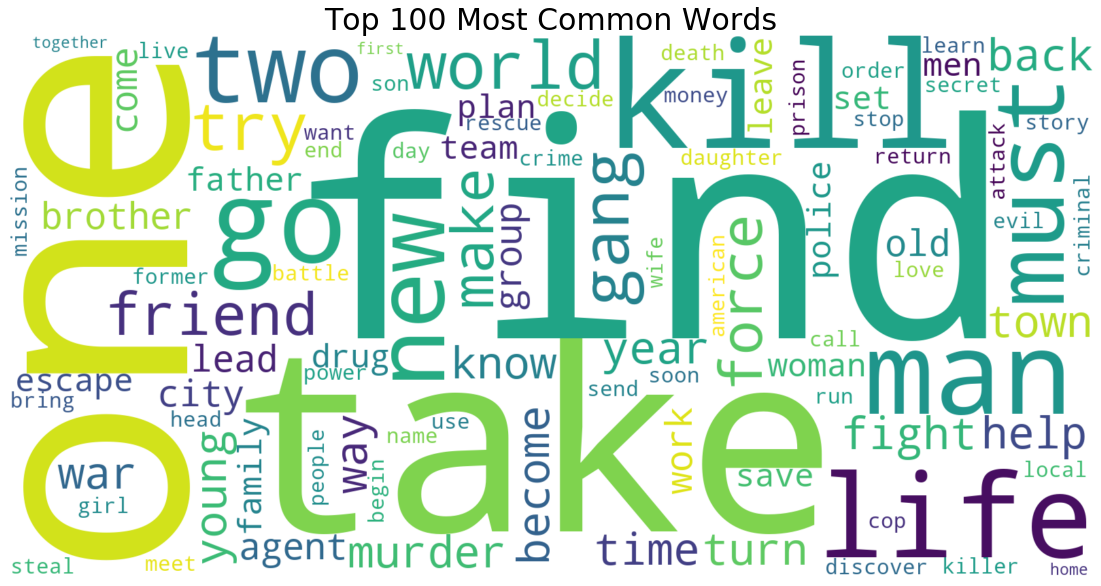

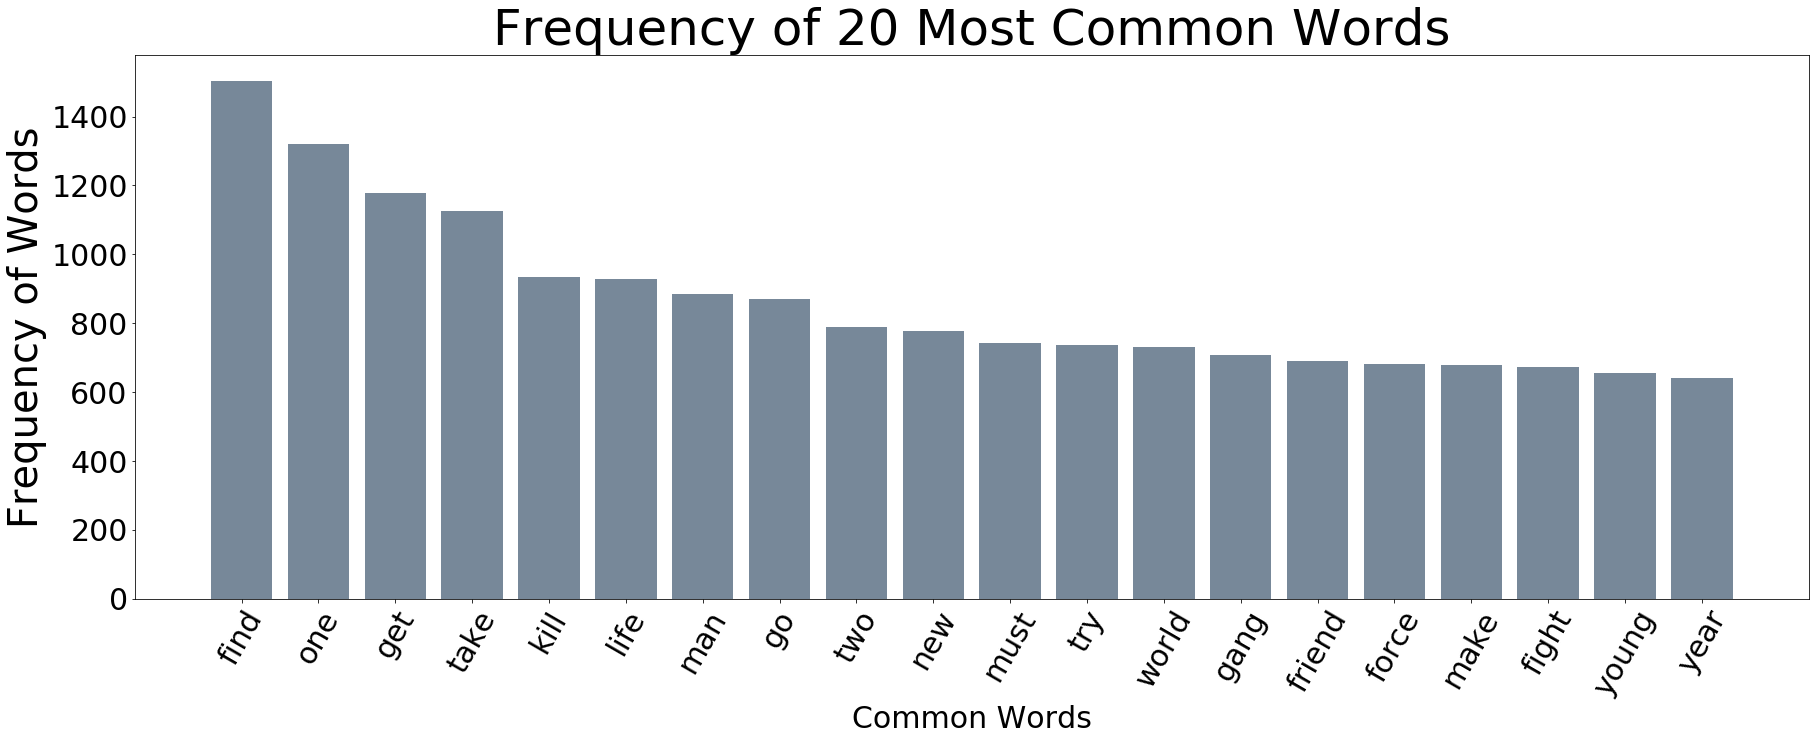

In [66]:
action_movies = movies_english[movies_english['Action']==1]
action_storylines = action_movies['storyline_clean']
generate_wordcloud_barchart(action_storylines)

<i> The action genre appears to have some unique words such as gang, force and fight that do not appear across other genres

#### Crime

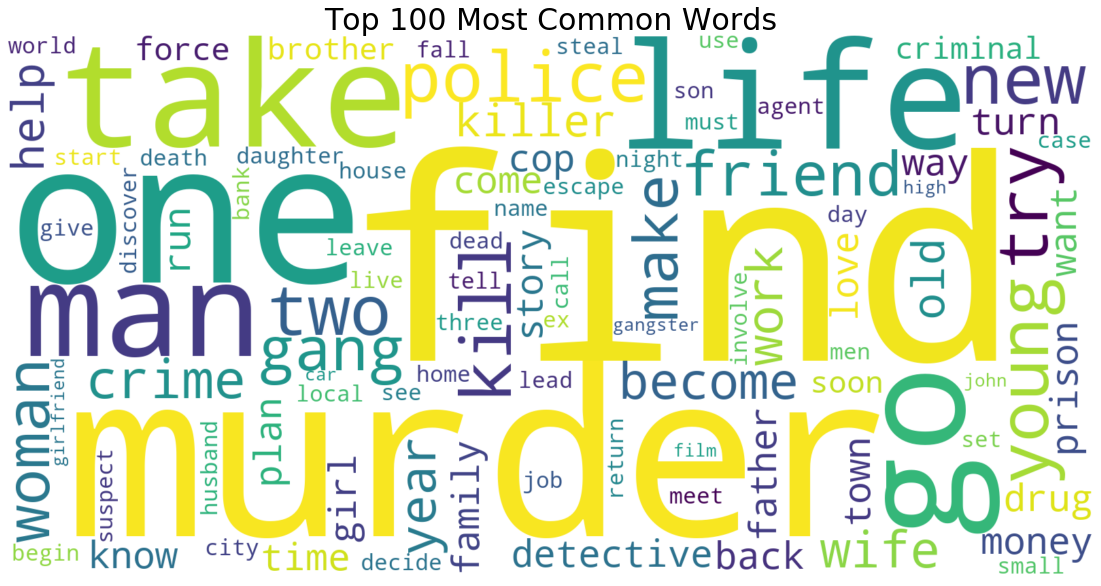

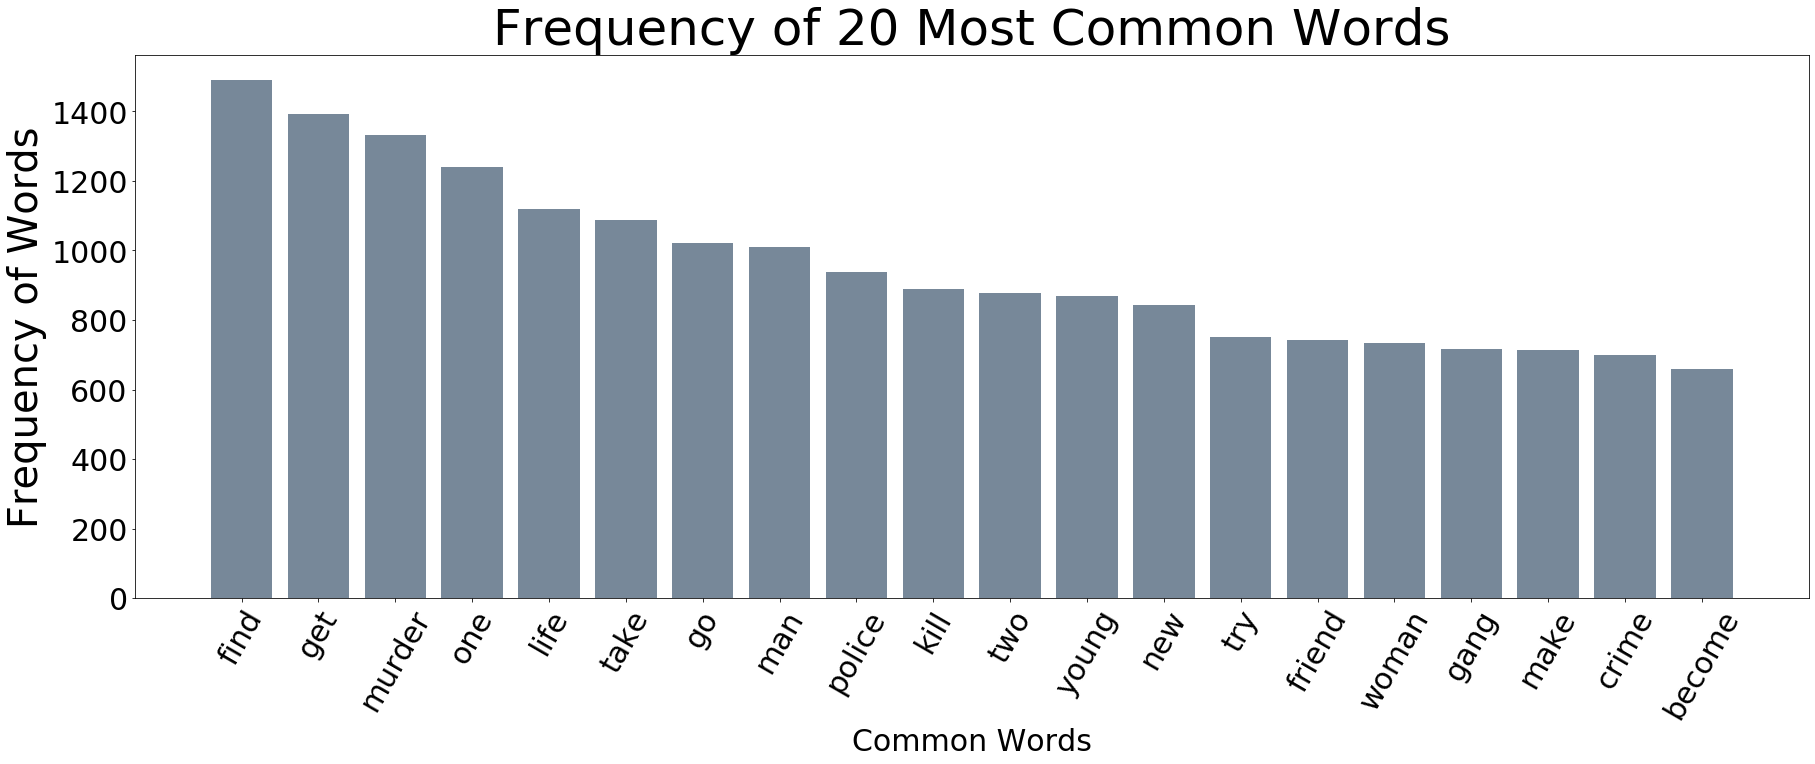

In [67]:
crime_movies = movies_english[movies_english['Crime']==1]
crime_storylines = crime_movies['storyline_clean']
generate_wordcloud_barchart(crime_storylines)

<i> Likewise, words such as police and crime appear to be unique to the crime genre

#### Adventure

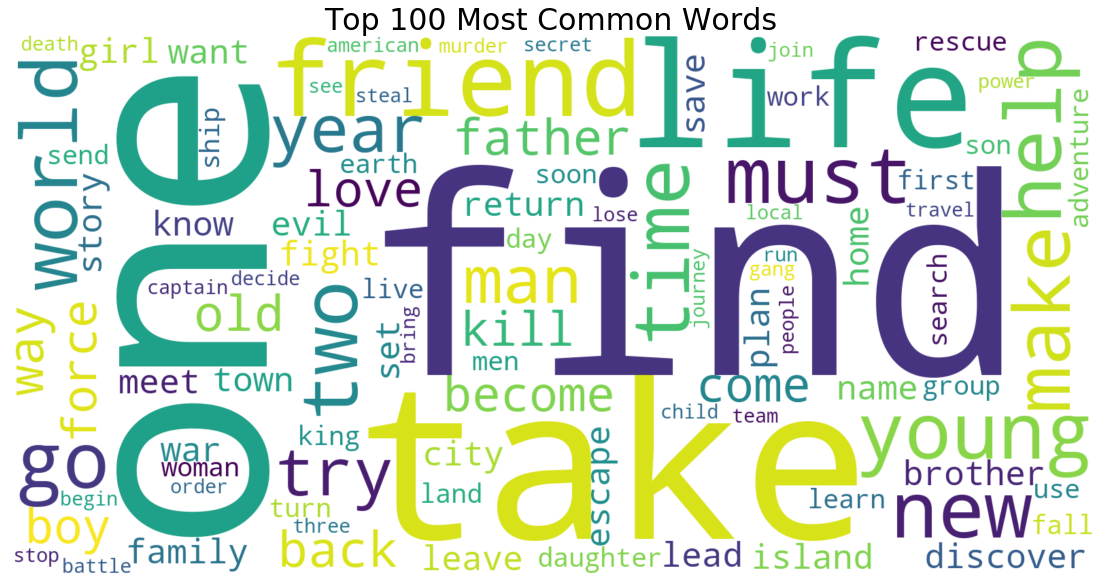

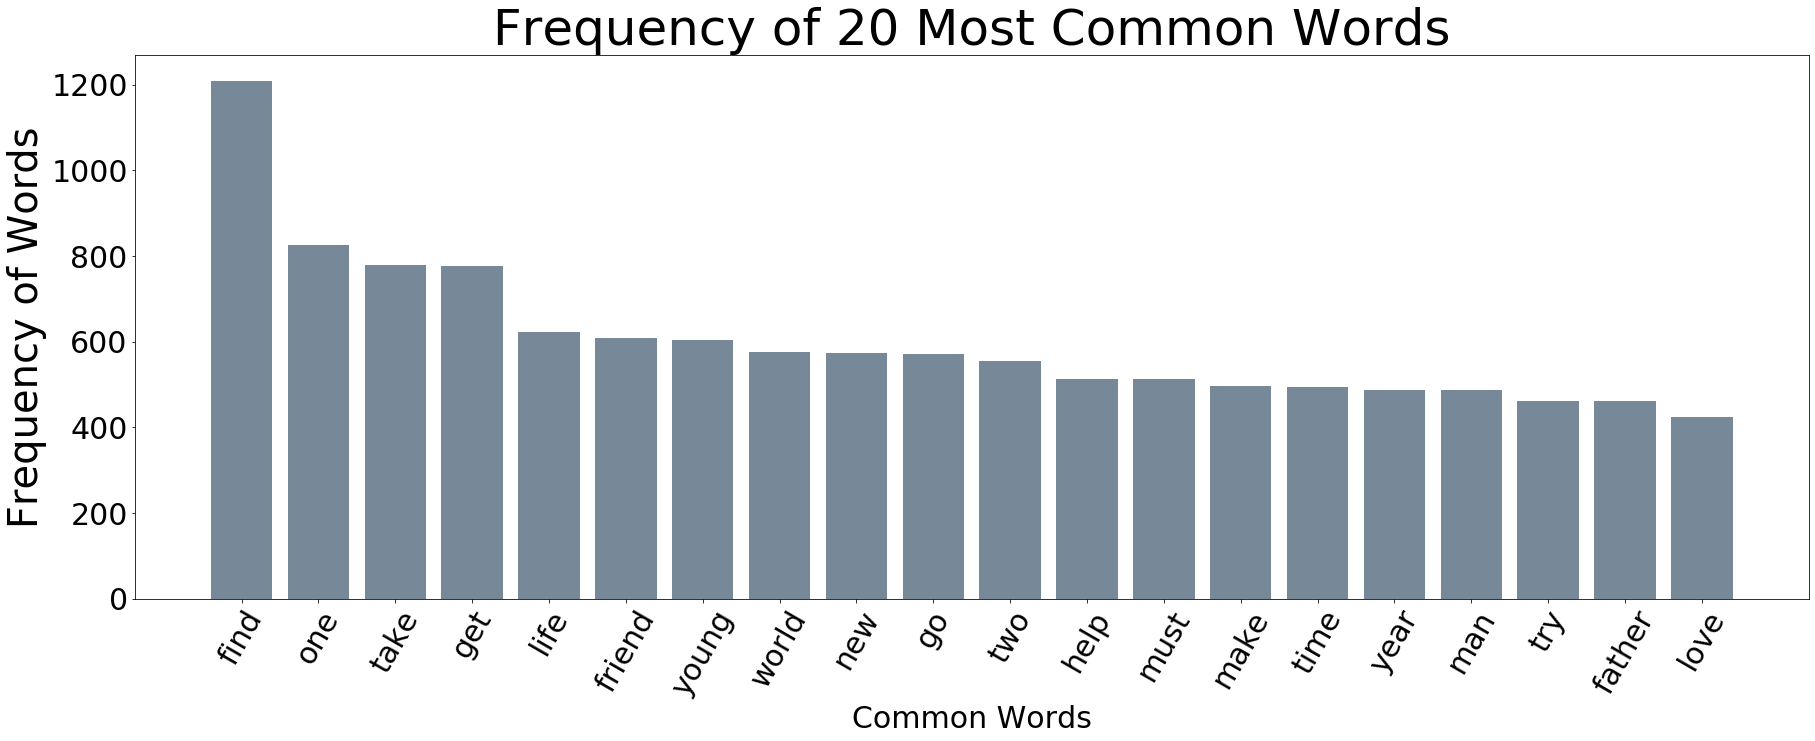

In [68]:
adventure_movies = movies_english[movies_english['Adventure']==1]
adventure_storylines = adventure_movies['storyline_clean']
generate_wordcloud_barchart(adventure_storylines)

<i> While there are some common words such as find, one and young, words such as help and time seem to be unique to the adventure genre

#### Mystery

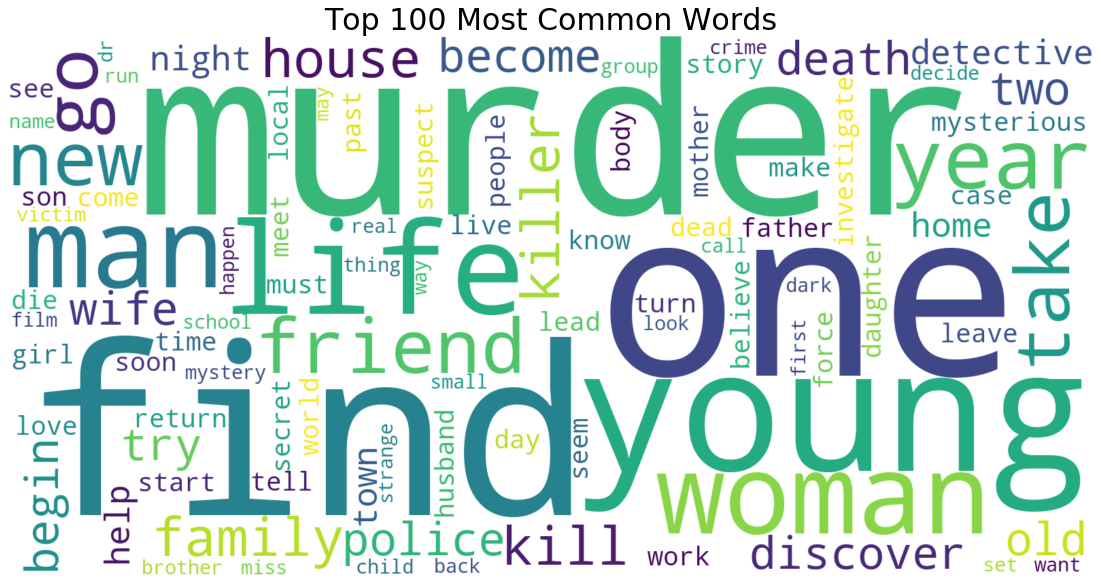

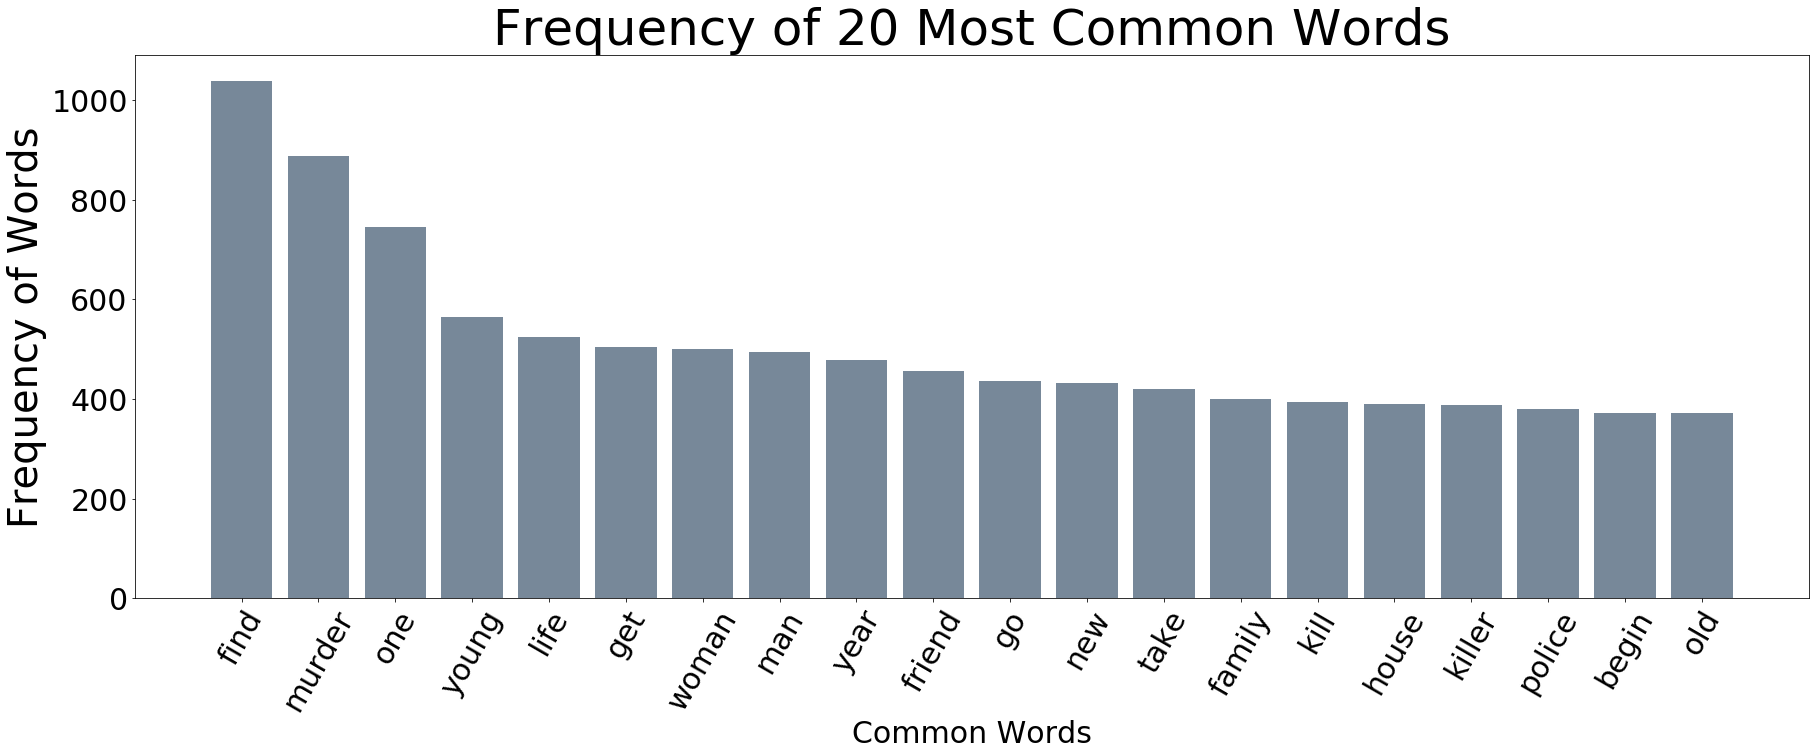

In [69]:
mystery_movies = movies_english[movies_english['Mystery']==1]
mystery_storylines = mystery_movies['storyline_clean']
generate_wordcloud_barchart(mystery_storylines)

<i> The mystery genre has words such as kill, police and murder that also occur across other similar genres such as horror, thriller and crime

#### Sci-Fi

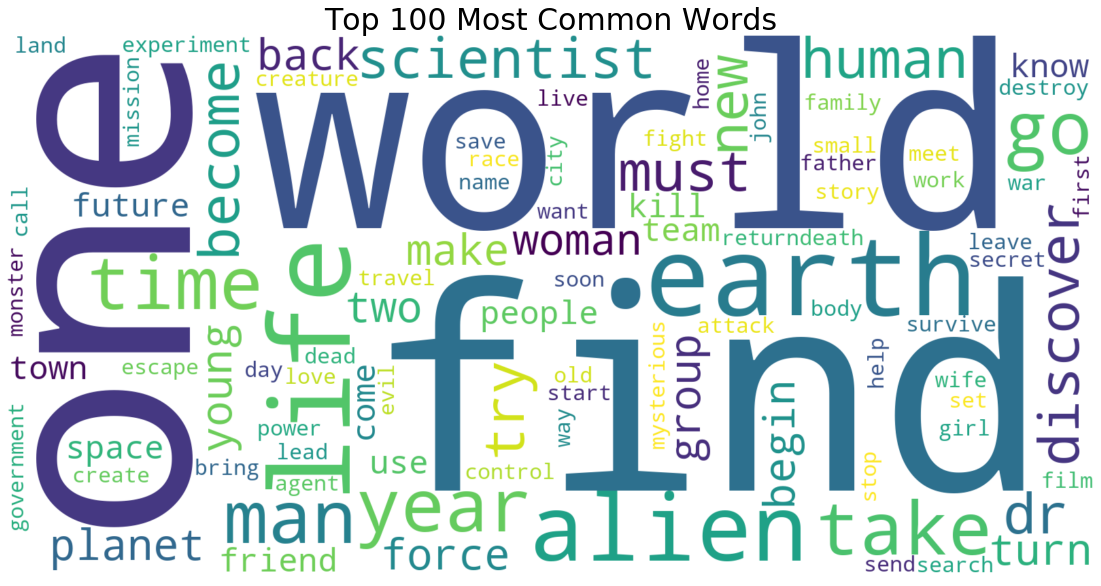

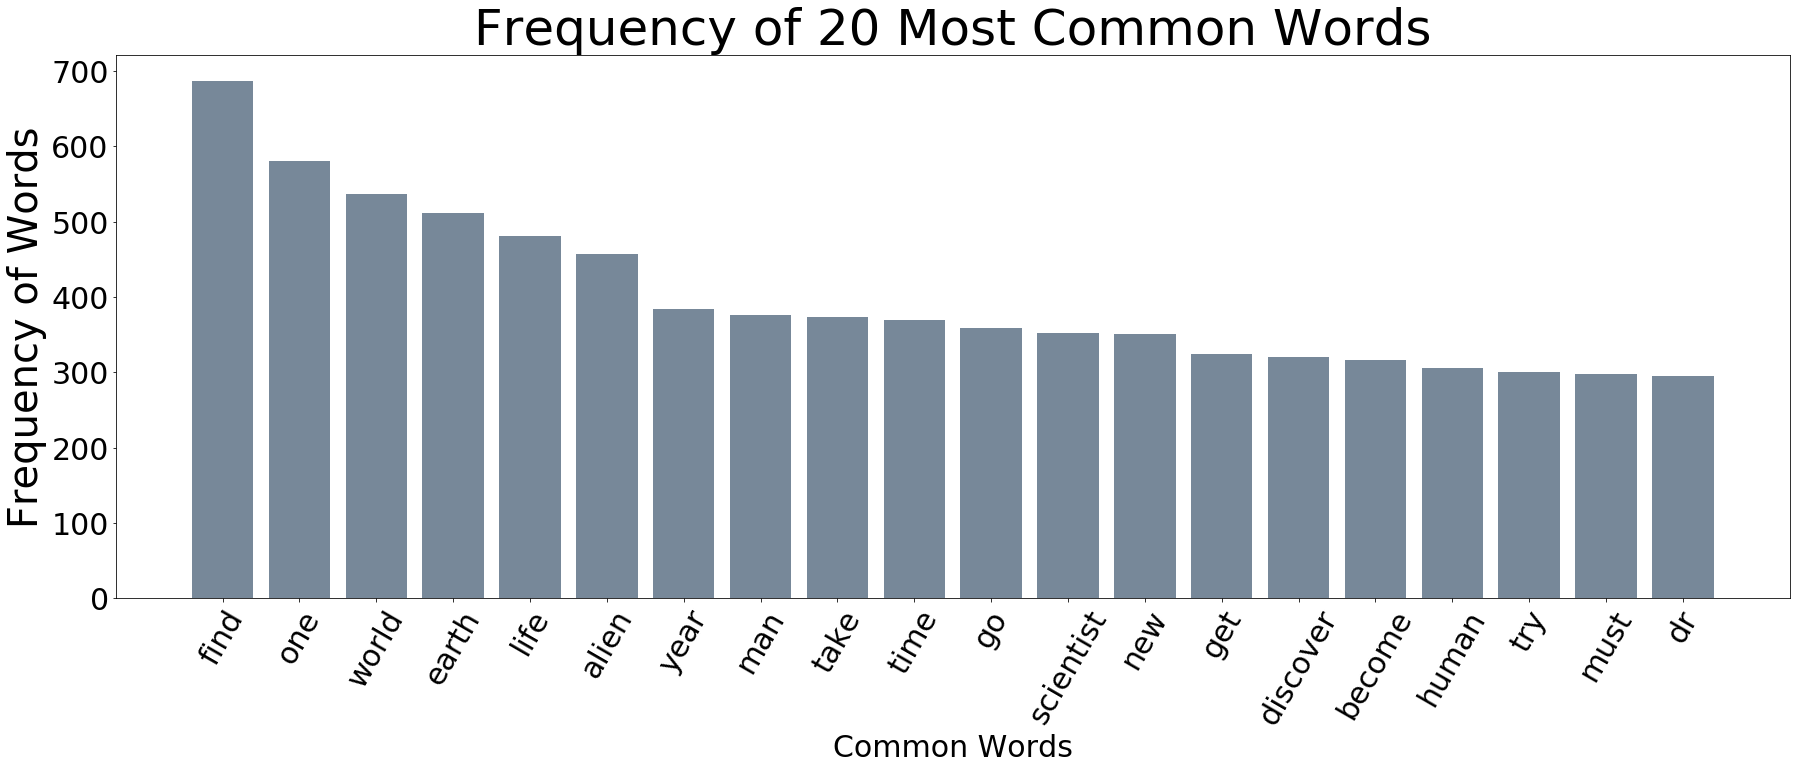

In [70]:
scifi_movies = movies_english[movies_english['Sci-Fi']==1]
scifi_storylines = scifi_movies['storyline_clean']
generate_wordcloud_barchart(scifi_storylines)

<i> The sci-fi genre does have a number of unique words such as alien, scientist, discover and dr that don't occur as frequently for other genres

<i> Overall, we see that words such as find, life, one, get and young have a high frequency across various genres. As such, we extract a list of the top 10 words that occur most frequently across all storylines and we will use these as stop_words within our models.

In [71]:
allwords_storylines = []
for story in movies_english['storyline_clean']:
    words = story.split()
    for word in words:
        allwords_storylines.append(word)
mostcommon_20 = FreqDist(allwords_storylines).most_common(20)

words_storyline = []
for item in mostcommon_20:
        words_storyline.append(item[0])
frequent_words = words_storyline[0:10]
frequent_words

['find', 'life', 'one', 'get', 'young', 'take', 'new', 'friend', 'go', 'year']

## Modeling - Movie Genre Prediction

In [72]:
movies_english.shape

(35847, 24)

<i> The prediction of genres is essentially a multi-label classification as we have seen that movies can belong to multiple genres. However, most traditional models are developed for single-label classification. Therefore, we will look at our multi-label classification as multiple single-label classifications, so that the existing algorithms can be applied. This is also known as a OneVsRest approach, as we train a binary classifier, one class at a time, and leave the rest out. The union of all genres that are predicted for a movie will be taken as the multi-label output.

### Train-test split

In [73]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss

In [74]:
categories = ['Drama', 'Comedy', 'Horror', 'Thriller', 'Romance',
       'Action', 'Crime', 'Adventure', 'Mystery', 'Sci-Fi', 
       'Music', 'Family', 'Fantasy', 'Western', 'Others']

<i> For our project, we are using the storyline to predict movie genres. As such the storyline is the X variable. As we will be performing a multi-label classification, we will include all the genre columns under the y variable.

In [75]:
X = movies_english['storyline_clean'] 
y = movies_english[['Drama', 'Comedy', 'Horror', 'Thriller', 'Romance',
       'Action', 'Crime', 'Adventure', 'Mystery', 'Sci-Fi', 
       'Music', 'Family', 'Fantasy', 'Western', 'Others']]

In [76]:
#Using train_test_split on X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle = True)

<i> We performed a 80-20 train-test split and have 27630 movies within our train dataset and 6908 movies within our test dataset.

In [77]:
X_train.shape

(28677,)

In [78]:
y_train.shape

(28677, 15)

In [79]:
X_test.shape

(7170,)

In [80]:
y_test.shape

(7170, 15)

<i> For this project, we will try 3 models used commonly for classification, K-Nearest Neighbors, Logistic Regression and Multinomial Naive Bayes.   
<br> 
We we will run each of the models through a pipeline with a vectorizer (we will be using the CountVectorizer and TfidfVectorizer) and perform a gridsearch to find the best-performing parameters. As drama is the genre with the most number of movies under it, we will test each of the pipeline models using the drama category and then run the best-performing variant across all categories.

### K-Nearest Neighbors 

<i> K-Nearest Neighbor classifier leverages a predefined number of training samples closest in distance to the new point, and predicts the label from these. 

#### TfidfVectorizer

In [81]:
#Creating a pipeline with two stages:
#1. TfidfVectorizer 
#2. KNN
pipe_knn_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = ['find', 'life', 'one', 'get', 'young', 
                                          'take', 'new', 'friend', 'go', 'year'])),
    #Using frequently occuring words across all storylines as stopwords
    ('knn', KNeighborsClassifier())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 15000, 20000, 25000
#Check individual tokens and also check individual tokens and 2-grams
#Check different values for number of neighbors: range(1,20,5)
#Check both euclidean and manhattan distance metrics

params_knn_tvec = {
    'tvec__max_features': [15000, 20000, 25000],
    'tvec__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': range(1, 20, 5),
    'knn__metric': ['euclidean', 'manhattan']
}

In [82]:
#Using pipeline object as a model
gs_knn_tvec = GridSearchCV(pipe_knn_tvec,
                  param_grid = params_knn_tvec, 
                  cv = 5) # 5-fold cross-validation

In [83]:
#Fit GridSearch to training data
gs_knn_tvec.fit(X_train, y_train['Drama'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn_

In [84]:
#Best score
gs_knn_tvec.best_score_

0.6336784213015824

In [85]:
#Best parameters
gs_knn_tvec.best_params_

{'knn__metric': 'euclidean',
 'knn__n_neighbors': 16,
 'tvec__max_features': 25000,
 'tvec__ngram_range': (1, 2)}

In [86]:
#Saving best model
gs_knn_tvec_model = gs_knn_tvec.best_estimator_

In [87]:
#Score model on training set
gs_knn_tvec_model.score(X_train, y_train['Drama'])

0.7002824563238833

In [88]:
#Score model on testing set
gs_knn_tvec_model.score(X_test, y_test['Drama'])

0.6309623430962343

#### CountVectorizer

In [89]:
#Creating a pipeline with two stages:
#1. CountVectorizer 
#2. KNN
pipe_knn_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words = ['find', 'life', 'one', 'get', 'young', 
                                          'take', 'new', 'friend', 'go', 'year'])),
    #Using frequently occuring words across all storylines as stopwords
    ('knn', KNeighborsClassifier())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 15000, 20000, 25000
#Check individual tokens and also check individual tokens and 2-grams
#Check different values for number of neighbors: range(1,20,5)
#Check both euclidean and manhattan distance metrics

params_knn_cvec = {
    'cvec__max_features': [15000, 20000, 25000],
    'cvec__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': range(1, 20, 5),
    'knn__metric': ['euclidean', 'manhattan']
}

In [90]:
#Using pipeline object as a model
gs_knn_cvec = GridSearchCV(pipe_knn_cvec,
                  param_grid = params_knn_cvec, 
                  cv = 5) # 5-fold cross-validation

In [91]:
#Fit GridSearch to training data
gs_knn_cvec.fit(X_train, y_train['Drama'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cvec__max_features': [15000, 20000, 25000],
                         'cv

In [92]:
#Best score
gs_knn_cvec.best_score_

0.569410559837743

In [93]:
#Best parameters
gs_knn_cvec.best_params_

{'cvec__max_features': 20000,
 'cvec__ngram_range': (1, 1),
 'knn__metric': 'euclidean',
 'knn__n_neighbors': 16}

In [94]:
#Saving best model
gs_knn_cvec_model = gs_knn_cvec.best_estimator_

In [95]:
#Score model on training set
gs_knn_cvec_model.score(X_train, y_train['Drama'])

0.6495449314781881

In [96]:
#Score model on testing set
gs_knn_cvec_model.score(X_test, y_test['Drama'])

0.5616457461645746

<i> While the performance is better when using the TfidfVectorizer, the K-Nearest Classifier performs generally poorly across both the train and test datasets. 

### Logistic Regression

<i> Logistic regression is a supervised learning classification model used to predict the target variable based on probability.

#### TfidfVectorizer

In [97]:
#Creating a pipeline with two stages:
#1. TfidfVectorizer 
#2. Logistic Regression
pipe_lr_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = ['find', 'life', 'one', 'get', 'young', 
                                          'take', 'new', 'friend', 'go', 'year'])),
    #Using frequently occuring words across all storylines as stopwords
    ('lr', LogisticRegression())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 15000, 20000, 25000
#Check individual tokens and also check individual tokens and 2-grams
#Check both l1 and l2 penalty
#Check different values of C: 0.1, 0.5, 1


params_lr_tvec = {
    'tvec__max_features': [15000, 20000, 25000],
    'tvec__ngram_range': [(1,1), (1,2)],
    'lr__penalty' : ['l2','l1'],
    'lr__C':[0.1, 0.5, 1]
}

In [98]:
#Using pipeline object as a model
gs_lr_tvec = GridSearchCV(pipe_lr_tvec,
                  param_grid = params_lr_tvec, 
                  cv = 5) # 5-fold cross-validation

In [99]:
#Fit GridSearch to training data
gs_lr_tvec.fit(X_train, y_train['Drama'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 0.5, 1], 'lr__penalty': ['l2', 'l1'],
                       

In [100]:
#Best score
gs_lr_tvec.best_score_

0.7124172329976082

In [101]:
#Best parameters
gs_lr_tvec.best_params_

{'lr__C': 0.5,
 'lr__penalty': 'l2',
 'tvec__max_features': 15000,
 'tvec__ngram_range': (1, 2)}

In [102]:
#Saving best model
gs_lr_tvec_model = gs_lr_tvec.best_estimator_

In [103]:
#Score model on training set
gs_lr_tvec_model.score(X_train, y_train['Drama'])

0.7888551801094954

In [104]:
#Score model on testing set
gs_lr_tvec_model.score(X_test, y_test['Drama'])

0.7140864714086471

#### CountVectorizer

In [105]:
#Creating a pipeline with two stages:
#1. CountVectorizer 
#2. Logistic Regression
pipe_lr_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words = ['find', 'life', 'one', 'get', 'young', 
                                          'take', 'new', 'friend', 'go', 'year'])),
    #Using frequently occuring words across all storylines as stopwords
    ('lr', LogisticRegression())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 15000, 20000, 25000
#Check individual tokens and also check individual tokens and 2-grams
#Check both l1 and l2 penalty
#Check different values of C: 0.1, 0.5, 1


params_lr_cvec = {
    'cvec__max_features': [15000, 20000, 25000],
    'cvec__ngram_range': [(1,1), (1,2)],
    'lr__penalty' : ['l2','l1'],
    'lr__C':[0.1, 0.5, 1]
}

In [106]:
#Using pipeline object as a model
gs_lr_cvec = GridSearchCV(pipe_lr_cvec,
                  param_grid = params_lr_cvec, 
                  cv = 5) # 5-fold cross-validation

In [107]:
#Fit GridSearch to training data
gs_lr_cvec.fit(X_train, y_train['Drama'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_features': [15000, 20000, 25000],
                         'cvec_

In [108]:
#Best score
gs_lr_cvec.best_score_

0.7017816412714509

In [109]:
#Best parameters
gs_lr_cvec.best_params_

{'cvec__max_features': 15000,
 'cvec__ngram_range': (1, 2),
 'lr__C': 0.1,
 'lr__penalty': 'l2'}

In [110]:
#Saving best model
gs_lr_cvec_model = gs_lr_cvec.best_estimator_

In [111]:
#Score model on training set
gs_lr_cvec_model.score(X_train, y_train['Drama'])

0.8370122397740349

In [112]:
#Score model on testing set
gs_lr_cvec_model.score(X_test, y_test['Drama'])

0.7051603905160391

<i> The logisitic regression models perform better than the K-Nearest Neighbor models. Overall, the TfidfVectorizer model performs slightly better but both the CountVectorizer and TfidfVectorizer models are overfitted.

### Multinomial Naive Bayes

<i> Multinomial Naive Bayes classifier is based on applying Bayes’ theorem with the assumption of conditional independence between the features in a dataset. It is commonly used for text classification.

#### TfidfVectorizer

In [113]:
#Creating a pipeline with two stages:
#1. TfidfVectorizer 
#2. Multinomial Naive Bayes
pipe_nb_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words= ['find', 'life', 'one', 'get', 'young',  
                                          'take', 'new', 'friend', 'go', 'year'])), 
    #Using frequently occuring words across all storylines as stopwords
    ('nb', MultinomialNB())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 15000, 20000, 25000
#Check individual tokens and also check individual tokens and 2-grams
#Check different values of alpha: 0, 0.5, 1

params_nb_tvec = {
    'tvec__max_features': [15000, 20000, 25000],
    'tvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': [0, 0.5, 1]
}

In [114]:
#Using pipeline object as a model
gs_nb_tvec = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [115]:
#Fit GridSearch to training data
gs_nb_tvec.fit(X_train, y_train['Drama'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [116]:
#Best score
gs_nb_tvec.best_score_

0.7165320847909592

In [117]:
#Best parameters
gs_nb_tvec.best_params_

{'nb__alpha': 1, 'tvec__max_features': 25000, 'tvec__ngram_range': (1, 2)}

In [118]:
#Saving best model
gs_nb_tvec_model = gs_nb_tvec.best_estimator_

In [119]:
#Score model on training set
gs_nb_tvec_model.score(X_train, y_train['Drama'])

0.8135439550859573

In [120]:
#Score model on testing set
gs_nb_tvec_model.score(X_test, y_test['Drama'])

0.7129707112970711

#### CountVectorizer

In [121]:
#Creating a pipeline with two stages:
#1. CountVectorizer 
#2. Multinomial Naive Bayes
pipe_nb_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words= ['find', 'life', 'one', 'get', 'young', 
                                          'take', 'new', 'friend', 'go', 'year'])),
    #Using frequently occuring words across all storylines as stopwords
    ('nb', MultinomialNB())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 15000, 20000, 25000
#Check individual tokens and also check individual tokens and 2-grams
#Check different values of alpha: 0, 0.5, 1

params_nb_cvec = {
    'cvec__max_features': [15000, 20000, 25000],
    'cvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': [0, 0.5, 1]
}

In [122]:
#Using pipeline object as a model
gs_nb_cvec = GridSearchCV(pipe_nb_cvec,
                  param_grid = params_nb_cvec, 
                  cv = 5) # 5-fold cross-validation

In [123]:
#Fit GridSearch to training data
gs_nb_cvec.fit(X_train, y_train['Drama'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_features': [15000, 20000, 25000],
                         'cvec__ngra

In [124]:
#Best score
gs_nb_cvec.best_score_

0.7149976592870371

In [125]:
#Best parameters
gs_nb_cvec.best_params_

{'cvec__max_features': 25000, 'cvec__ngram_range': (1, 2), 'nb__alpha': 1}

In [126]:
#Saving best model
gs_nb_cvec_model = gs_nb_cvec.best_estimator_

In [127]:
#Score model on training set
gs_nb_cvec_model.score(X_train, y_train['Drama'])

0.8044077134986226

In [128]:
#Score model on testing set
gs_nb_cvec_model.score(X_test, y_test['Drama'])

0.708507670850767

<i> Overall, the Multinomial Naive Bayes classifier with the TfidfVectorizer and the Logistic Regression classifier with the TfidfVectorizer perform roughly the same (0.72 test accuracy), although both models are overfitted.

### Production Model

<i> We pick the Multinomial Naive Bayes model with TfidfVectorizer as the production model. Before proceeding, we train the model on the various genres we want to predict. 

In [129]:
#Creating list to record predictions from all the models
predictions = []

#### Drama

In [130]:
#Using pipeline object as a model
gs_nb_tvec_drama = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [131]:
#Fit GridSearch to training data
gs_nb_tvec_drama.fit(X_train, y_train['Drama'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [132]:
#Best score
gs_nb_tvec_drama.best_score_

0.7165320847909592

In [133]:
#Best parameters
gs_nb_tvec_drama.best_params_

{'nb__alpha': 1, 'tvec__max_features': 25000, 'tvec__ngram_range': (1, 2)}

In [134]:
#Saving best model
gs_nb_tvec_model_drama = gs_nb_tvec_drama.best_estimator_

In [135]:
#Score model on training set
gs_nb_tvec_model_drama.score(X_train, y_train['Drama'])

0.8135439550859573

In [136]:
#Score model on testing set
gs_nb_tvec_model_drama.score(X_test, y_test['Drama'])

0.7129707112970711

In [137]:
#Using model to predict genre for test set
y_pred_drama = gs_nb_tvec_model_drama.predict(X_test).tolist()
predictions.append(y_pred_drama)

#### Comedy

In [138]:
#Using pipeline object as a model
gs_nb_tvec_comedy = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [139]:
#Fit GridSearch to training data 
gs_nb_tvec_comedy.fit(X_train, y_train['Comedy'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [140]:
#Best score
gs_nb_tvec_comedy.best_score_

0.7632946355722711

In [141]:
#Best parameters
gs_nb_tvec_comedy.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [142]:
#Saving best model
gs_nb_tvec_model_comedy = gs_nb_tvec_comedy.best_estimator_

In [143]:
#Score model on training set
gs_nb_tvec_model_comedy.score(X_train, y_train['Comedy'])

0.8363496879031976

In [144]:
#Score model on testing set
gs_nb_tvec_model_comedy.score(X_test, y_test['Comedy'])

0.7774058577405858

In [145]:
#Using model to predict genre for test set
y_pred_comedy = gs_nb_tvec_model_comedy.predict(X_test).tolist()
predictions.append(y_pred_comedy)

#### Horror

In [146]:
#Using pipeline object as a model
gs_nb_tvec_horror = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [147]:
#Fit GridSearch to training data 
gs_nb_tvec_horror.fit(X_train, y_train['Horror'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [148]:
#Best score
gs_nb_tvec_horror.best_score_

0.8801128710030046

In [149]:
#Best parameters
gs_nb_tvec_horror.best_params_

{'nb__alpha': 0.5, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [150]:
#Saving best model
gs_nb_tvec_model_horror = gs_nb_tvec_horror.best_estimator_

In [151]:
#Score model on training set
gs_nb_tvec_model_horror.score(X_train, y_train['Horror'])

0.9079750322558148

In [152]:
#Score model on testing set
gs_nb_tvec_model_horror.score(X_test, y_test['Horror'])

0.8885634588563459

In [153]:
#Using model to predict genre for test set
y_pred_horror = gs_nb_tvec_model_horror.predict(X_test).tolist()
predictions.append(y_pred_horror)

#### Thriller

In [154]:
#Using pipeline object as a model
gs_nb_tvec_thriller = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [155]:
#Fit GridSearch to training data 
gs_nb_tvec_thriller.fit(X_train, y_train['Thriller'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [156]:
#Best score
gs_nb_tvec_thriller.best_score_

0.830351921634146

In [157]:
#Best parameters
gs_nb_tvec_thriller.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [158]:
#Saving best model
gs_nb_tvec_model_thriller = gs_nb_tvec_thriller.best_estimator_

In [159]:
#Score model on training set
gs_nb_tvec_model_thriller.score(X_train, y_train['Thriller'])

0.8672455277748718

In [160]:
#Score model on testing set
gs_nb_tvec_model_thriller.score(X_test, y_test['Thriller'])

0.8344490934449094

In [161]:
#Using model to predict genre for test set
y_pred_thriller = gs_nb_tvec_model_thriller.predict(X_test).tolist()
predictions.append(y_pred_thriller)

#### Romance

In [162]:
#Using pipeline object as a model
gs_nb_tvec_romance = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [163]:
#Fit GridSearch to training data 
gs_nb_tvec_romance.fit(X_train, y_train['Romance'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [164]:
#Best score
gs_nb_tvec_romance.best_score_

0.8482755815607753

In [165]:
#Best parameters
gs_nb_tvec_romance.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [166]:
#Saving best model
gs_nb_tvec_model_romance = gs_nb_tvec_romance.best_estimator_

In [167]:
#Score model on training set
gs_nb_tvec_model_romance.score(X_train, y_train['Romance'])

0.886145691669282

In [168]:
#Score model on testing set
gs_nb_tvec_model_romance.score(X_test, y_test['Romance'])

0.8578800557880055

In [169]:
#Using model to predict genre for test set
y_pred_romance = gs_nb_tvec_model_romance.predict(X_test).tolist()
predictions.append(y_pred_romance)

#### Action

In [170]:
#Using pipeline object as a model
gs_nb_tvec_action = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [171]:
#Fit GridSearch to training data 
gs_nb_tvec_action.fit(X_train, y_train['Action'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [172]:
#Best score
gs_nb_tvec_action.best_score_

0.8710813850697775

In [173]:
#Best parameters
gs_nb_tvec_action.best_params_

{'nb__alpha': 0.5, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [174]:
#Saving best model
gs_nb_tvec_model_action = gs_nb_tvec_action.best_estimator_

In [175]:
#Score model on training set
gs_nb_tvec_model_action.score(X_train, y_train['Action'])

0.8927014680754611

In [176]:
#Score model on testing set
gs_nb_tvec_model_action.score(X_test, y_test['Action'])

0.8741980474198048

In [177]:
#Using model to predict genre for test set
y_pred_action = gs_nb_tvec_model_action.predict(X_test).tolist()
predictions.append(y_pred_action)

#### Crime

In [178]:
#Using pipeline object as a model
gs_nb_tvec_crime = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [179]:
#Fit GridSearch to training data 
gs_nb_tvec_crime.fit(X_train, y_train['Crime'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [180]:
#Best score
gs_nb_tvec_crime.best_score_

0.8673849737171373

In [181]:
#Best parameters
gs_nb_tvec_crime.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [182]:
#Saving best model
gs_nb_tvec_model_crime = gs_nb_tvec_crime.best_estimator_

In [183]:
#Score model on training set
gs_nb_tvec_model_crime.score(X_train, y_train['Crime'])

0.9047668863549185

In [184]:
#Score model on testing set
gs_nb_tvec_model_crime.score(X_test, y_test['Crime'])

0.8728033472803347

In [185]:
#Using model to predict genre for test set
y_pred_crime = gs_nb_tvec_model_crime.predict(X_test).tolist()
predictions.append(y_pred_crime)

#### Adventure

In [186]:
#Using pipeline object as a model
gs_nb_tvec_adventure = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [187]:
#Fit GridSearch to training data 
gs_nb_tvec_adventure.fit(X_train, y_train['Adventure'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [188]:
#Best score
gs_nb_tvec_adventure.best_score_

0.9065105806305699

In [189]:
#Best parameters
gs_nb_tvec_adventure.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 1)}

In [190]:
#Saving best model
gs_nb_tvec_model_adventure = gs_nb_tvec_adventure.best_estimator_

In [191]:
#Score model on training set
gs_nb_tvec_model_adventure.score(X_train, y_train['Adventure'])

0.9381037068033615

In [192]:
#Score model on testing set
gs_nb_tvec_model_adventure.score(X_test, y_test['Adventure'])

0.9114365411436541

In [193]:
#Using model to predict genre for test set
y_pred_adventure = gs_nb_tvec_model_adventure.predict(X_test).tolist()
predictions.append(y_pred_adventure)

#### Mystery

In [194]:
#Using pipeline object as a model
gs_nb_tvec_mystery = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [195]:
#Fit GridSearch to training data 
gs_nb_tvec_mystery.fit(X_train, y_train['Mystery'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [196]:
#Best score
gs_nb_tvec_mystery.best_score_

0.9239459799926799

In [197]:
#Best parameters
gs_nb_tvec_mystery.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [198]:
#Saving best model
gs_nb_tvec_model_mystery = gs_nb_tvec_mystery.best_estimator_

In [199]:
#Score model on training set
gs_nb_tvec_model_mystery.score(X_train, y_train['Mystery'])

0.9381037068033615

In [200]:
#Score model on testing set
gs_nb_tvec_model_mystery.score(X_test, y_test['Mystery'])

0.9206415620641563

In [201]:
#Using model to predict genre for test set
y_pred_mystery = gs_nb_tvec_model_mystery.predict(X_test).tolist()
predictions.append(y_pred_mystery)

#### Sci-Fi

In [202]:
#Using pipeline object as a model
gs_nb_tvec_scifi = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [203]:
#Fit GridSearch to training data 
gs_nb_tvec_scifi.fit(X_train, y_train['Sci-Fi'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [204]:
#Best score
gs_nb_tvec_scifi.best_score_

0.9398472517597906

In [205]:
#Best parameters
gs_nb_tvec_scifi.best_params_

{'nb__alpha': 0.5, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [206]:
#Saving best model
gs_nb_tvec_model_scifi = gs_nb_tvec_scifi.best_estimator_

In [207]:
#Score model on training set
gs_nb_tvec_model_scifi.score(X_train, y_train['Sci-Fi'])

0.947972242563727

In [208]:
#Score model on testing set
gs_nb_tvec_model_scifi.score(X_test, y_test['Sci-Fi'])

0.9397489539748954

In [209]:
#Using model to predict genre for test set
y_pred_scifi = gs_nb_tvec_model_scifi.predict(X_test).tolist()
predictions.append(y_pred_scifi)

#### Music

In [210]:
#Using pipeline object as a model
gs_nb_tvec_music = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [211]:
#Fit GridSearch to training data 
gs_nb_tvec_music.fit(X_train, y_train['Music'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [212]:
#Best score
gs_nb_tvec_music.best_score_

0.951354749944978

In [213]:
#Best parameters
gs_nb_tvec_music.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [214]:
#Saving best model
gs_nb_tvec_model_music = gs_nb_tvec_music.best_estimator_

In [215]:
#Score model on training set
gs_nb_tvec_model_music.score(X_train, y_train['Music'])

0.9704292638700004

In [216]:
#Score model on testing set
gs_nb_tvec_model_music.score(X_test, y_test['Music'])

0.9485355648535565

In [217]:
#Using model to predict genre for test set
y_pred_music = gs_nb_tvec_model_music.predict(X_test).tolist()
predictions.append(y_pred_music)

#### Family

In [218]:
#Using pipeline object as a model
gs_nb_tvec_family = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [219]:
#Fit GridSearch to training data 
gs_nb_tvec_family.fit(X_train, y_train['Family'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [220]:
#Best score
gs_nb_tvec_family.best_score_

0.9539352187928245

In [221]:
#Best parameters
gs_nb_tvec_family.best_params_

{'nb__alpha': 0, 'tvec__max_features': 20000, 'tvec__ngram_range': (1, 1)}

In [222]:
#Saving best model
gs_nb_tvec_model_family = gs_nb_tvec_family.best_estimator_

In [223]:
#Score model on training set
gs_nb_tvec_model_family.score(X_train, y_train['Family'])

0.9719287233671583

In [224]:
#Score model on testing set
gs_nb_tvec_model_family.score(X_test, y_test['Family'])

0.9559274755927476

In [225]:
#Using model to predict genre for test set
y_pred_family = gs_nb_tvec_model_family.predict(X_test).tolist()
predictions.append(y_pred_family)

#### Fantasy

In [226]:
#Using pipeline object as a model
gs_nb_tvec_fantasy = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [227]:
#Fit GridSearch to training data 
gs_nb_tvec_fantasy.fit(X_train, y_train['Fantasy'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [228]:
#Best score
gs_nb_tvec_fantasy.best_score_

0.9551557030103393

In [229]:
#Best parameters
gs_nb_tvec_fantasy.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 1)}

In [230]:
#Saving best model
gs_nb_tvec_model_fantasy = gs_nb_tvec_fantasy.best_estimator_

In [231]:
#Score model on training set
gs_nb_tvec_model_fantasy.score(X_train, y_train['Fantasy'])

0.965268333507689

In [232]:
#Score model on testing set
gs_nb_tvec_model_fantasy.score(X_test, y_test['Fantasy'])

0.9524407252440725

In [233]:
#Using model to predict genre for test set
y_pred_fantasy = gs_nb_tvec_model_fantasy.predict(X_test).tolist()
predictions.append(y_pred_fantasy)

#### Western

In [234]:
#Using pipeline object as a model
gs_nb_tvec_western = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [235]:
#Fit GridSearch to training data 
gs_nb_tvec_western.fit(X_train, y_train['Western'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [236]:
#Best score
gs_nb_tvec_western.best_score_

0.9714405902730912

In [237]:
#Best parameters
gs_nb_tvec_western.best_params_

{'nb__alpha': 0, 'tvec__max_features': 25000, 'tvec__ngram_range': (1, 1)}

In [238]:
#Saving best model
gs_nb_tvec_model_western = gs_nb_tvec_western.best_estimator_

In [239]:
#Score model on training set
gs_nb_tvec_model_western.score(X_train, y_train['Western'])

0.9930257697806605

In [240]:
#Score model on testing set
gs_nb_tvec_model_western.score(X_test, y_test['Western'])

0.9691771269177127

In [241]:
#Using model to predict genre for test set
y_pred_western = gs_nb_tvec_model_western.predict(X_test).tolist()
predictions.append(y_pred_western)

#### Others

In [242]:
#Using pipeline object as a model
gs_nb_tvec_others = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [243]:
#Fit GridSearch to training data 
gs_nb_tvec_others.fit(X_train, y_train['Others'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['find',
                                                                    'life',
                                                                    'one',
                                                                    'get',
                                                                    'young',
                                                                    'take',
                                                                    'new',
                                                                    'friend',
                                                                    'go',
                                                                    'year'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1],
                         'tvec__max_features': [15000, 

In [244]:
#Best score
gs_nb_tvec_others.best_score_

0.8824842321063133

In [245]:
#Best parameters
gs_nb_tvec_others.best_params_

{'nb__alpha': 0, 'tvec__max_features': 15000, 'tvec__ngram_range': (1, 2)}

In [246]:
#Saving best model
gs_nb_tvec_model_others = gs_nb_tvec_others.best_estimator_

In [247]:
#Score model on training set
gs_nb_tvec_model_others.score(X_train, y_train['Others'])

0.9104508839836803

In [248]:
#Score model on testing set
gs_nb_tvec_model_others.score(X_test, y_test['Others'])

0.8736401673640167

In [249]:
#Using model to predict genre for test set
y_pred_others = gs_nb_tvec_model_others.predict(X_test).tolist()
predictions.append(y_pred_others)

### Evaluation

<i> We observe that the genres from the top 10 with more distinct words, such as the adventure and sci-fi genres, perform a lot better than genres such as drama and comedy. In general, the model seems to perform a lot better for the less common genres such as family, fantasy and western.

<i> We will now use the predictions for each genre to generate the multi-label output. This will be used to evaluate the overall performance.

In [250]:
categories = ['Drama', 'Comedy', 'Horror', 'Thriller', 'Romance',
       'Action', 'Crime', 'Adventure', 'Mystery', 'Sci-Fi', 
       'Music', 'Family', 'Fantasy', 'Western', 'Others']

In [251]:
#Predicted labels
y_pred = {}

for i in range(0, len(categories)):
    y_pred[categories[i]] = predictions[i]
    
y_pred = pd.DataFrame(y_pred)
y_pred

Drama  Comedy  Horror  Thriller  Romance  Action  Crime  Adventure  \
0         1       0       0         0        0       0      0          0   
1         0       1       0         0        0       0      0          0   
2         1       1       0         0        0       0      0          0   
3         1       0       0         0        0       0      0          0   
4         0       0       0         0        0       0      0          0   
...     ...     ...     ...       ...      ...     ...    ...        ...   
7165      1       0       0         0        0       0      1          0   
7166      0       1       0         0        0       0      0          0   
7167      0       1       0         0        0       0      0          0   
7168      0       0       1         1        0       0      0          0   
7169      0       0       0         0        0       0      0          0   

      Mystery  Sci-Fi  Music  Family  Fantasy  Western  Others  
0           0       0      0       0        0        0       0  
1           0       0      0       0        0        0       0  
2           0       0      0       0        0        0       0  
3           0       0      0       0        0        0       0  
4           0       0      0       0        0        0       0  
...       ...     ...    ...     ...      ...      ...     ...  
7165        0       0      0       0        0        0       0  
7166        0       0      0       0        0        0       0  
7167        0       0      0       0        0        0       0  
7168        0       0      0       0        0        0       0  
7169        0       0      0       0        0        0       0  

[7170 rows x 15 columns]

In [252]:
#True labels
y_test

Drama  Comedy  Horror  Thriller  Romance  Action  Crime  Adventure  \
23152      0       0       0         1        0       0      0          0   
29704      0       1       0         0        0       0      0          0   
20279      0       1       0         0        0       0      0          0   
33412      1       0       0         0        0       0      0          0   
29503      1       0       0         0        1       0      0          0   
...      ...     ...     ...       ...      ...     ...    ...        ...   
17246      1       0       0         1        0       1      0          0   
22608      0       0       0         0        0       0      0          1   
20303      0       1       0         0        0       0      0          0   
30898      0       0       1         1        0       0      0          0   
16596      1       0       0         1        0       0      0          0   

       Mystery  Sci-Fi  Music  Family  Fantasy  Western  Others  
23152        0       0      0       0        1        0       0  
29704        0       0      0       0        0        0       0  
20279        0       0      0       0        0        0       0  
33412        0       0      0       0        0        0       0  
29503        1       0      0       0        0        0       0  
...        ...     ...    ...     ...      ...      ...     ...  
17246        0       0      0       0        0        0       0  
22608        0       0      0       1        0        0       1  
20303        0       0      0       0        0        0       0  
30898        1       0      0       0        0        0       0  
16596        1       0      0       0        0        0       0  

[7170 rows x 15 columns]

<i> To evaluate how well our model performs overall, we use two metrics, accuracy score and hamming loss.

<i> Accuracy_score computes subset accuracy, the number of observations for which the set of predicted labels exactly match the true labels. For example, if a movie falls under romance, comedy and drama, the predictions must have the same 3 labels.

In [253]:
accuracy_test = accuracy_score(y_test, y_pred, normalize=True)
accuracy_test

0.1497907949790795

<i> Hamming_loss computes the fraction of labels that are incorrectly predicted.

In [256]:
hamming_loss_test = hamming_loss(y_test, y_pred)
hamming_loss_test

0.11401208740120874

<i> Although the model has relatively low hamming loss (showing that around 88% of the labels are correctly identified), the subset accuracy is poor likely due to misclassification of the more common genres such as drama, comedy and romance where the storylines are less distinct.

### Misclassification 

<i> Based on the preview of the y_test and y_pred dataframes above, we can see that the observation with the index number 20279 was predicted to be only a comedy when in fact it falls under the both comedy and drama genre.

In [270]:
movies_english.loc[20279]['storyline_clean']

'top world popular child actor tv hollywood punchline everything wrong people famous child dickie roberts want find one gig restore honor everyone love learn rob reiner make ambitious new movie destine sweep oscar dickie first line audition walk learn certainly look part act yet owe unusual childhood research role dickie embark bizarre scheme live suburban family see average american child life put son glove dickie discovers great part true family whether get part attempt method act certainly change life forever'

<i> Instances such as these, where the label is correctly predicted (comedy) but an additional label is predicted as well (drama), lead to lower accuracy scores even though the one of the predicted labels is right.

<i> We also see cases of movies that were predicted as falling under no genre, likely because they have somewhat unique storylines that could fall in various genres but don't have a distinct identity.

In [281]:
movies_english.loc[29503]['storyline_clean']

'moscow communist katya secretly spy american cold war arm race land big assignment steal secret rise government star alexander last thing expect fall love reconcile passion belief communism mean make great sacrifice life sacrifice alexander uncovers thirty year later'

In [265]:
movies_english.loc[16596]['storyline_clean']

'joe ross develop process make company fortune also make whoever fortune detail keep secret secure however executive company seem reluctant commit bonus royalty ross start look option also new friend wealthy jimmy dell happy give advice matter'

### Limitations and Next Steps

<i> In using the OneVsRest Classifier for training our model, we ignore any correlation between genres for movies with multiple labels. However, this may not always be the case.

In addition, labels are predicted based purely on the unique genres found within the IMDB dataset. Further iterations of the model maybe required to train for new genres.

## Modeling - Recommender System

<i>As new online streaming services enter the market, customer experience and satisfaction are becoming increasingly important for attracting and retaining an audience. In the fight for customer engagement and dollars, personalization can be key. This is why companies such as Netflix and Amazon invest in strong recommender systems to provide personalized recommendations and redefine the viewing experience.  

### Recommender using storyline 

<i> For the purpose of this project, we will aim to create a system that recommends movies that are similar to a particular movie in terms of storyline.

<i> To begin with, we use the TfidfVectorizer to vectorize our text. We restrict the maximum features to 25000 as using all features will likely lead to a very sparse matrix.

In [271]:
#Initializing vectorizer
tvec_story = TfidfVectorizer(max_features = 25000)

In [272]:
#Transforming storylines to word vectors
tfidf_matrix_story = tvec_story.fit_transform(movies_english['storyline_clean']) 

In [273]:
#Inspecting shape
tfidf_matrix_story.shape

(35847, 25000)

<i> To compute similarity, we will use cosine similarity as our metric. Cosine similarity is used to measure how similar the documents are irrespective of their size. 

In [274]:
#Importing library
from sklearn.metrics.pairwise import cosine_similarity

In [275]:
cosine_sim_story = cosine_similarity(tfidf_matrix_story)

<i> As we will require the movie indices to extract the movies, we create a series with the indices and titles.

In [276]:
indices = pd.Series(movies_english.index, index=movies_english['title']).drop_duplicates()

<i> We then define a function to extract the top 10 recommendations based on similarity in the storylines.

In [277]:
#Defining function to extract top 10 recommendations based on storyline
def top10_recommendations_storyline(title, similarity):
    index = indices[title]
    scores = list(enumerate(similarity[index]))
    scores = sorted(scores, key = lambda x: x[1], reverse = True)
    scores = scores[1:11]
    print(scores)
    movie_indices = [i[0] for i in scores]
    return movies_english['original_title'].iloc[movie_indices]

### Evaluation

In [279]:
top10_recommendations_storyline('Shrek', cosine_sim_story)

[(19935, 0.5338778465084898), (35748, 0.533551137015697), (23489, 0.48698018428458417), (21435, 0.3424119253720925), (30420, 0.2969685189012304), (19942, 0.19413810158143113), (17508, 0.1761074405265888), (17889, 0.1738235237539616), (5211, 0.15755957653219949), (27623, 0.14282855926784935)]


19935                   Shrek 2
35748              Shrek Retold
23489       Shrek Forever After
21435           Shrek the Third
30420         Shrek the Musical
19942      Touching Wild Horses
17508                Swamp Girl
17889                     Fiona
5211     Lure of the Wilderness
27623               Hatchet III
Name: original_title, dtype: object

<i> As the recommendations are based on storyline, it makes sense that recommendations for Shrek include sequels and related movies with similar characters.

In [280]:
top10_recommendations_storyline('Toy Story 4', cosine_sim_story)

[(15711, 0.5151605895273755), (31290, 0.32213245057028356), (34556, 0.3052099213075487), (7124, 0.2834981096863525), (22562, 0.23410269779159973), (34332, 0.22446409339512666), (10943, 0.21151497384211698), (22109, 0.19777619597236584), (8788, 0.1863596917005019), (1115, 0.18557740194801842)]


15711                Toy Story
31290     Welcome to Happiness
34556             Lazer Team 2
7124                       Ada
22562    It's a Boy Girl Thing
34332           Lost in London
10943                Condorman
22109            The Elder Son
8788        Up Your Teddy Bear
1115          Babes in Toyland
Name: original_title, dtype: object

<i> Likewise, for Toy Story , the system provides recommendations related to toys and being lost, both central themes in the movie.

<i> However, as we probably know from our personal habits, viewing habits are seldom as simplistic. Therefore, it would be worthwhile to build a recommender system that takes into account other factors such as genre as well. As such, we will use a recommender system based on genre and description (although truncated in some cases).

In [282]:
movies_english.head()

imdb_title_id                                              title  \
0     tt0002101                                          Cleopatra   
1     tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
2     tt0002461                                        Richard III   
3     tt0003167                                     Amore di madre   
4     tt0003471                                   Traffic in Souls   

                                      original_title  year             genre  \
0                                          Cleopatra  1912    Drama, History   
1  From the Manger to the Cross; or, Jesus of Naz...  1912  Biography, Drama   
2                                        Richard III  1912             Drama   
3                                   Home, Sweet Home  1914             Drama   
4                                   Traffic in Souls  1913      Crime, Drama   

                                         description  \
0  The fabled queen of Egypt's affair with Roman ...   
1  An account of the life of Jesus Christ, based ...   
2  Richard of Gloucester uses manipulation and mu...   
3  John Howard Payne at his most miserable point ...   
4  A woman, with the aid of her police officer sw...   

                                           storyline  Drama  Crime  Horror  \
0      When she discovers that a slave named Phar...      1      0       0   
1      An account of the life of Jesus Christ, ba...      1      0       0   
2      Shakespeare's tragedy of the hump-backed D...      1      0       0   
3      Over the protests of his mother and sweeth...      1      0       0   
4      An early social commentary on the New York...      1      1       0   

   ...  Adventure  Action  Romance  Sci-Fi  Mystery  Thriller  Music  Others  \
0  ...          0       0        0       0        0         0      0       1   
1  ...          0       0        0       0        0         0      0       1   
2  ...          0       0        0       0        0         0      0       0   
3  ...          0       0        0       0        0         0      0       0   
4  ...          0       0        0       0        0         0      0       0   

   storyline_length                                    storyline_clean  
0                96  discover slave name pharon profess love cleopa...  
1                85  account life jesus christ base book new testam...  
2                34  shakespeare tragedy hump back duke gloucester ...  
3               182  protest mother sweetheart writer john howard p...  
4                36  early social commentary new york sex trade fil...  

[5 rows x 24 columns]

In [283]:
#Combining genre and description columns
movies_english['genre_desc_comb'] = movies_english['genre'] +" "+ movies_english['description']

In [284]:
#Cleaning the text in the genre column using previously defined function to make it data ready
movies_english['genre_desc_comb_clean'] = movies_english['genre_desc_comb'].apply(cleaning_text)

In [285]:
#Initializing vectorizer
tvec_genre_desc = TfidfVectorizer(max_features = 25000)

In [286]:
#Transforming genres to word vectors
tfidf_matrix_genre_desc = tvec_genre_desc.fit_transform(movies_english['genre_desc_comb_clean']) 
tfidf_matrix_genre_desc

<35847x25000 sparse matrix of type '<class 'numpy.float64'>'
	with 614115 stored elements in Compressed Sparse Row format>

In [287]:
#Inspecting shape
tfidf_matrix_genre_desc.shape

(35847, 25000)

In [288]:
cosine_sim_genre_desc = cosine_similarity(tfidf_matrix_genre_desc)

In [289]:
#Defining function to extract top 10 recommendations based on genre and description
def top10_recommendations_genre_desc(title, similarity):
    index = indices[title]
    scores = list(enumerate(similarity[index]))
    scores = sorted(scores, key = lambda x: x[1], reverse = True)
    scores = scores[1:11]
    print(scores)
    movie_indices = [i[0] for i in scores]
    return movies_english['original_title'].iloc[movie_indices]

### Evaluation

In [290]:
top10_recommendations_genre_desc('Shrek', cosine_sim_genre_desc)

[(35748, 0.4698876042743462), (8800, 0.22471414653887486), (25994, 0.21856214996711198), (1926, 0.20439039344726934), (10359, 0.20365884609748255), (17341, 0.2017438075890938), (1976, 0.18596359346753175), (34807, 0.1754199700978373), (12049, 0.17421160792215576), (27089, 0.17398435747459065)]


35748                       Shrek Retold
8800                       One More Time
25994                          The Lorax
1926     Snow White and the Seven Dwarfs
10359                        Fairy Tales
17341                         Hyperspace
1976        The Adventures of Robin Hood
34807                             Onward
12049     Wizards of the Lost Kingdom II
27089                 The Lords of Salem
Name: original_title, dtype: object

In [291]:
top10_recommendations_genre_desc('Toy Story 4', cosine_sim_genre_desc)

[(8788, 0.3799258867378395), (32193, 0.2988172559561044), (32843, 0.28311058117639754), (15711, 0.23192235886187038), (15211, 0.22642315319872455), (10227, 0.22332378344187698), (14498, 0.21410138490600186), (18595, 0.21128646159445932), (8592, 0.21111343390499895), (32763, 0.195513635568956)]


8788           Up Your Teddy Bear
32193        Playmobil: The Movie
32843                   Time Toys
15711                   Toy Story
15211    Revenge of the Red Baron
10227     The Mouse and His Child
14498                        Toys
18595                       Angst
8592        The Phantom Tollbooth
32763    By Light of Desert Night
Name: original_title, dtype: object

<i> Using the genres along with description appears to give a better set of recommendations, moving beyond just movies with the same/similar characters. This will benefit Binge as customers are more likely to discover new content.

### Limitations and Next Steps

<i>  The recommender models above are simple models based on the exhaustive list of movies marked to be in English within the IMDB dataset. Expanding the pool of movies will increase the richness of the recommendations provided. In addition, these recommender systems are purely content-based as the Binge platform is currently under development and the company does not have access to any user data. 

Once the platform has been launched and user data is available, Binge can look into developing collaborative recommender systems that can provide recommendations based on user profiles.

## Conclusion

<i>New content is being generated everyday. IMDB recorded 9906 feature film releases in 2020 alone.

The genre prediction and recommender systems provide a good starting point for Binge to optimize its internal operations and create an entertainment platform that can engage and vow users. 
<br>   
Once Binge rolls out its services, it can also look into collecting user feedback and undertaking A/B testing to improve its content classification and recommendation capabilities.